# CAPSTONE PROJECT: Predicción de Popularidad Musical #

## OBJETIVO
***Construir y evaluar modelos de aprendizaje automático para aplicaciones específicas en la industria de la música y el entretenimiento.***

## Ejemplos de Aplicación

### 1. Recomendaciones de Contenido
   - Utilizar modelos para prever la popularidad potencial de nuevas canciones antes de su lanzamiento.
   - Ayudar a compañías discográficas, plataformas de transmisión de música, managers y artistas a tomar decisiones informadas sobre estrategias de lanzamiento y promoción.

### 2. Segmentación de Audiencia
   - Analizar las características de las canciones que contribuyen más a su popularidad.
   - Ayudar a segmentar la audiencia según preferencias específicas y personalizar las recomendaciones de música para diferentes grupos demográficos.

### 3. Optimización de Repertorio
   - Comprender qué características musicales están asociadas con el éxito para tomar decisiones al seleccionar canciones para incluir en los repertorios.

### 4. Estrategias de Marketing
   - Conocer las características que contribuyen al éxito de una canción para desarrollar campañas más efectivas de promoción musical.

### 5. Análisis de Tendencias
   - Utilizar modelos para realizar un análisis de tendencias en la industria musical.

### 6. Colaboraciones Artísticas
   - Ayudar a artistas y productores a tomar decisiones sobre colaboraciones artísticas identificando artistas o géneros que funcionan bien juntos.


In [161]:
# Importaciones básicas
import numpy as np
import pandas as pd
import datetime

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento de datos
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Modelos de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Estadísticas y análisis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### IMPORTACIÓN DE LOS ARCHIVOS ###

In [162]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/PROYECTO_FINAL/SPOTIFY

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/PROYECTO_FINAL/SPOTIFY


In [163]:
a = pd.read_csv ('Artists.csv')
b = pd.read_csv ('Top_Songs_US.csv')

### LIMPIEZA y EXPLORACIÓN INICIAL DE DATOS ###

El conjunto de datos seleccionado para este proyecto consta de dos datasets obtenidos de Kaggle, derivados de la extracción de la base de datos a través de la API de Spotify. Estos conjuntos de datos son relevantes para las reproducciones en Estados Unidos en el mes de diciembre del año 2023.

- El primer conjunto de datos, denominado **'Artist'**, proporciona información detallada sobre varios artistas, abarcando aspectos como género, edad, país, géneros musicales, popularidad y cantidad de seguidores.

- El segundo conjunto de datos, llamado **'Top songs'**, contiene información detallada sobre canciones, álbumes y artistas. Incluye información sobre la reproducibilidad, la presencia de contenido explícito (sexual, agresivo, machista, etc.), la duración de las canciones, entre otros aspectos relevantes."

In [164]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9488 non-null   object
 1   ID          9488 non-null   object
 2   Gender      7829 non-null   object
 3   Age         9488 non-null   int64 
 4   Country     6305 non-null   object
 5   Genres      9488 non-null   object
 6   Popularity  9488 non-null   int64 
 7   Followers   9488 non-null   int64 
 8   URI         9488 non-null   object
dtypes: int64(3), object(6)
memory usage: 667.2+ KB


Llevo a cabo un análisis exploratorio de datos en ambos dataframes (df_a y df_b). Este proceso abarca la revisión de estadísticas descriptivas, la identificación de valores nulos y un análisis general de los datos.

En el proceso de exploración, busco comprender la distribución y la diversidad de las variables en cada dataset. Además, identifico posibles problemas como valores nulos o anomalías que puedan requerir una limpieza posterior. 

Este análisis inicial sienta las bases para un procesamiento de datos más efectivo y una comprensión más profunda de la información contenida en los conjuntos de datos.

In [165]:
# Comprobación de valores nulos en df a
print("Valores nulos en df a:", a.isnull().sum().sum())
print("Valores NaN en df a:", a.isna().sum().sum())

# Comprobación de valores duplicados en df a
duplicados_a = a.duplicated()
print("Duplicados en df a:", duplicados_a.sum())

# Comprobación de valores nulos en df b
print("Valores nulos en df b:", b.isnull().sum().sum())
print("Valores NaN en df b:", b.isna().sum().sum())

# Comprobación de valores duplicados en df b
duplicados_b = b.duplicated()
print("Duplicados en df b:", duplicados_b.sum())

Valores nulos en df a: 4842
Valores NaN en df a: 4842
Duplicados en df a: 0
Valores nulos en df b: 0
Valores NaN en df b: 0
Duplicados en df b: 33109


### Descripción del DataFrame 'a'- Artistas en Spotify (Diciembre 2023) ###

Este DataFrame se obtuvo de Kaggle a mediados de diciembre de 2023 y proviene de la extracción de la base de datos mediante la API de Spotify.

**Resumen General:**

- Número de Filas: 9488
- Número de Columnas: 9

**Columnas y Descripciones:**

- **Name:** Nombre del artista (objeto).
- **ID:** Identificación del artista (objeto).
- **Gender:** Género del artista (objeto).
- **Age:** Edad del artista (entero).
- **Country:** País del artista (objeto).
- **Genres:** Géneros musicales asociados al artista (objeto).
- **Popularity Artist:** Puntuación de popularidad del artista (entero).
- **Followers:** Número de seguidores del artista (entero).
- **URI:** Identificación única de recursos asociada al artista (objeto).


Este conjunto de datos proporciona información detallada sobre varios artistas, abordando aspectos clave que definen su presencia en la plataforma. Contempla factores como género, edad, país de origen, géneros musicales, popularidad y seguidores, brindando una visión profunda de la diversidad y popularidad de los artistas en Spotify.

Un análisis detallado del mismo, resultará crucial para comprender la dinámica artística en la plataforma y sus implicaciones.

**Limpieza de Valores Nulos y Duplicados:**

En esta fase, se abordaron los valores nulos y duplicados en el conjunto de datos. Se implementaron las siguientes acciones:

Se reemplazó el 17% de los valores nulos en la columna "Gender" con la categoría 'no definido', y se aplicó un enfoque similar reemplazando el 34% de los valores nulos en la columna "Country".

Se realizaron ajustes en la categorización de datos cuando se consideró necesario para mejorar la coherencia y completitud del conjunto de datos.

In [166]:
b.drop_duplicates(inplace=True)

In [167]:
a['Gender'] = a['Gender'].fillna('desconocido')
a['Country'] = a['Country'].fillna('otros')

In [168]:
print(a['Gender'].unique()) # falta un 17%
print(a['Country'].unique()) # falta un 34%

['male' 'female' 'mixed' 'other' 'desconocido']
['CA' 'US' 'GB' 'CO' 'PR' 'otros' 'NO' 'FR' 'AU' 'PA' 'SE' 'DE' 'NL' 'BR'
 'DK' 'DO' 'AR' 'MX' 'JM' 'PH' 'KR' 'ES' 'AT' 'IT' 'VE' 'NZ' 'IE' 'TR'
 'CU' 'BE' 'RO' 'IL' 'IN' 'PL' 'JP' 'UY' 'FI' 'ID' 'DZ' 'XK' 'TW' 'SG'
 'AG' 'CL' 'PT' 'ZA' 'NG' 'HK' 'AW' 'AL' 'GR' 'SN' 'BA' 'BD' 'BO' 'LT'
 'UA' 'CN' 'RU' 'IS' 'HU' 'PK' 'CV' 'PE' 'MY' 'HN' 'LV' 'CH' 'BG' 'SK'
 'CD' 'TH' 'MK' 'EE' 'CM' 'VN' 'SI' 'GT' 'JO' 'CZ' 'MD' 'NI' 'HR' 'TN'
 'ML' 'GE' 'AO' 'KZ' 'XE' 'ST' 'GH' 'SR' 'BY' 'VG' 'SB' 'BF' 'XW' 'MA'
 'CI' 'SU' 'IR' 'YU' 'PY']


**Europa** GB, NO, FR, AT, IT, IE, BE, RO, IL, PL, TR, CZ, RU, CH, BG, SK, HU, GR, NL, PT, SE, DK, FI, IS, EE, SI, LT, LV, HR, BA, MK, RS, AL, ME, XK, CY, MT, LU, MC, SM, AD, VA

**América del Sur** CO, BR, VE, AR, CL, UY, PE, BO, EC, PY, GT, HN, SV, NI, CR, PA, CU, DO

**América del Norte** CA, US, MX, PR

**Asia** PH, KR, IN, ID, JP, CN, HK, TW, SG, MY, TH, VN, BD, LK, KH, MM, NP, MN, KZ, UZ, TJ, TM, KG, GE, AM, AZ, BY, UA, MD, AL, PK, BT

**Oceanía**
AU, NZ, FJ, PG, SB, VU, NC, PF

**África** DZ, ZA, NG, CV, SN, BF, CM, CD, TH, MK, EE, CM, VN, SI, GT, JO, CZ, MD, NI, HR, TN, ML, AO, KZ, ST, GH, SR, BY, VG, SB, BF, XW, MA, CI, SU

**sin clasificar** XK', 'XE', 'ST', 'GH', 'VG' y **otros**



**Observación:** Se destaca que la procedencia geográfica de los grupos musicales abarca todos los continentes, y queda un número mínimo sin clasificar en ningún continente. El resto son los faltantes que se clasificarán en "Otros".

In [250]:
a.head()

,Name,ID,Gender,Age,Country,Genres,Popularity Artist,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X


In [170]:
a.describe().round(0)

,Age,Popularity,Followers
count,9488.0,9488.0,9488.0
mean,19.0,47.0,1233563.0
std,20.0,17.0,4587259.0
min,0.0,0.0,0.0
25%,0.0,37.0,16237.0
50%,14.0,48.0,133590.0
75%,33.0,58.0,732868.0
max,149.0,100.0,115998928.0


**Resumen Estadístico:**

**Recuento (Count):** Todas las columnas tienen 9488 entradas no nulas. No hay valores faltantes.

**Edad (AGE):**
- **Media (Media):** La edad promedio es de 19 años.
- **Desviación Estándar (Std):** La desviación estándar alta indica una dispersión significativa, pero se observa que hay anomalías en los datos.
- **Valores Mínimos (Min):** Hay anomalías en los datos, ya que se registra una edad mínima de 0 y máxima de 149, lo que parece imposible.
- **Valores Máximos (Max):** La edad máxima es 149, lo que resulta improbable para un artista.

**Popularidad (POPULARITY):**
- **Media (Media):** La puntuación promedio de popularidad es de alrededor de 47.
- **Cuartiles (25%, 50%, 75%):** El 25% de los artistas tienen una popularidad inferior a 37, y el 75% tienen una puntuación inferior a 58.

**Seguidores (FOLLOWERS):**
- **Media (Media):** La cantidad promedio de seguidores es de aproximadamente 1'2 Millones.
- **Cuartiles (25%, 50%, 75%):** El 25% de los artistas tienen menos de 16.237 seguidores, y el 75% tienen menos de 732.868 seguidores.

**Análisis de Edad:**
- Existen inconsistencias en los datos de edad, con valores mínimos y máximos poco realistas.
- La mayoría de los artistas son relativamente jóvenes, pero las anomalías en los datos de edad afectan la interpretación.

**Nota:** La fiabilidad del análisis puede estar comprometida debido a las inconsistencias en los datos de edad. Me da a suponer que deberemos prescindir de esta columna para el análisis.

In [171]:
(a['Age'].unique())

array([ 33,  25,  29,  35,  26,  28,  27,  22,  43,  30,  20,  18,   8,
        40,  23,  24,  21,  36,  37,  12,  32,  34,  44,  52,   0,  47,
        42,  17,  50,  31,  11,  41,   9,  10,  15,   6,  39,   5,   7,
        16,  45,  38,  54,  58,   3,  51,   4,  19,  59,  55,  49,  48,
        92,  78,  14,   2,  69,  74,  13,   1,  46,  82,  71,  75,  84,
        67,  63,  87,  73,  53,  85,  77,  72,  83,  61,  89,  60,  79,
        57,  66,  90,  81,  64,  88,  70,  94,  56,  62,  65,  91,  68,
        76,  80,  86,  96, 123,  93,  97, 149, 110])

In [172]:
# Filtrar el DataFrame para obtener las filas con edades menores de 15 años
young_artists = a[a['Age'] < 15]
young_artists[['Name', 'Age']].T

,14,27,45,48,51,54,58,68,73,79,...,9464,9465,9469,9471,9472,9473,9474,9475,9483,9487
Name,The Chainsmokers,Imagine Dragons,Swae Lee,Major Lazer,Migos,Manuel Turizo,Anne-Marie,Clean Bandit,Offset,Darell,...,Martina Paz,Menchu Lauchengco-Yulo,英仁合唱團,Boujee,Winterkind,Bombotunes,Panama,Pablo Paz,IVAN$ITO,Lakko
Age,8,12,0,12,12,0,0,12,0,0,...,0,0,5,0,0,0,10,0,0,0


- Apreciamos muchas edades inferiores a la mayoría de edad, están erróneas seguro.

Busco los artistas cuya edad es por debajo los 15 años, porque no cuadra y veo la media: 

- The Chainsmokers 31 de diciembre de 1989) y Alex Pall (Nueva York, 16 de mayo de 1985). 35 años
- DAN (IMAGINE DRAGONS) nació el 14 de julio en 1987 en Las ...  36 años
- Swae Lee NACIDO EL 7 de juny del 1993 (30 años)
- Major Lazer diplo 10 de noviembre de 1978 (45 años)
- Migos (nacido 2 de abril de 1991 (32 años)
- Manuel Turizo (Montería, 12 de abril de 2000)
- Anne-Marie  Essex, Inglaterra, 7 de abril de 1991)
- Clean Bandit  10 de diciembre de 1985 (38 años)
- Offset Georgia, 14 de diciembre de 1991 (32 años)
- Darell (Puerto Rico, 5 de enero de 1990) (33 años)
- Twenty One Pilots  1 de diciembre de 1988  (35 años)
- Paulo Londra (Córdoba, 12 de abril de 1998) (25 años)
- Piso 21  20 de enero de 1990  (33 años)
- Tones And I 3 de mayo de 1993 (30 años) 
- Mount Martha, Victoria,
- 5 Seconds of Summer 16 de julio de 1996 (29 años)
- Bastille 14 de julio de 1986 (37 años)
- Rauw Alejandro  (San Juan, Puerto Rico; 10 de enero de 1993) (30 años)
- Cheat Codes (35 años)
- Rae Sremmurd  nacido el 29 de diciembre de 1991
- Lukas Graham 18 de septiembre de 1988) 35
- Mau y Ricky l 21 de noviembre de 1990) 33
- One Direction 13 de septiembre de 1993  30
- Little Mix 4 de octubre de 1991  32
- Maiara & Maraisa 31 de diciembre de 1987)  35
- BLACKPINK 3 de enero de 1995)  28

Quedan por encontrar varias más, 
- Goodboys, MEDUZA, CNCO, Rafa Pabön, Galantis, Rudimental, Dan + Shay, Morat, Nio Garcia, Jhayco, Axwell /\ Ingrosso, Casper Magico, Dynoro, DNCE, SAINt JHN, Jowell & Randy,  X Ambassadors,  The Supremes ,  Kris Kross Amsterdam,  Sandro Cavazza  , Ezhel ,  Y2K  ,   KYLE   ,  PNL  ,  Disclosure , Regard ,   Loud Luxury, LANY, Polo G , Brandon Lake, Cali Y El Dandee, Jack Ü, Chris Jedi, Simone Mendes, Starley, Dakota Lotus, Ryan Riback, Mike Perry, The Greatest Showman Ensemble, WATTS, ANAVITÓRIA, Seeb, Zé Neto & Cristiano, Florida Georgia Line, BTS, Matheus & Kauan, Mambo Kingz, Fifth Harmony, Lil Pump  Henrique & Juliano .....

Pero llegado el punto, y sintiéndolo mucho, no contaremos con esta información.

In [173]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 12891
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Album Type          4037 non-null   object
 1   Artist ID           4037 non-null   object
 2   Artist Name         4037 non-null   object
 3   Artist Song Rank    4037 non-null   int64 
 4   Track Name          4037 non-null   object
 5   Is Playable         4037 non-null   bool  
 6   Album Name          4037 non-null   object
 7   Release Date        4037 non-null   object
 8   Total Album Tracks  4037 non-null   int64 
 9   Is Explicit         4037 non-null   bool  
 10  ISRC                4037 non-null   object
 11  Song Duration       4037 non-null   int64 
 12  Track Number        4037 non-null   int64 
 13  Popularity          4037 non-null   int64 
 14  Track Id            4037 non-null   object
 15  Track URI           4037 non-null   object
dtypes: bool(2), int64(5), o

Dado que observamos un índice de popularidad en este DataFrame, pero esta vez referente al artista, procedemos a renombrar las columnas en ambos DataFrames para clarificar a qué popularidad se hace referencia.

In [174]:
a.rename(columns={'Popularity': 'Popularity Artist'}, inplace=True)

In [175]:
b.rename(columns={'Popularity': 'Popularity Song'}, inplace=True)

### Descripción del DataFrame 'b'.- Top Songs - Spotify (Diciembre 2023) ###

Este DataFrame se obtuvo de Kaggle a mediados de finales de 2023 y proviene de la extracción de la base de datos mediante la API de Spotify. Proporciona información detallada sobre las principales canciones en la plataforma. Recogiendo las 10 canciones Top por cada artista.

**Resumen General:**

- Número de Filas: 12891
- Número de Columnas: 16

**Columnas y Descripciones:**

- **Album Type:** Tipo de álbum (objeto).
- **Artist ID:** Identificación del artista (objeto).
- **Artist Name:** Nombre del artista (objeto).
- **Artist Song Rank:** Rango de la canción del artista (entero).
- **Track Name:** Nombre de la canción (objeto).
- **Is Playable:** Indicador de si la canción es reproducible (booleano).
- **Album Name:** Nombre del álbum (objeto).
- **Release Date:** Fecha de lanzamiento del álbum (objeto).
- **Total Album Tracks:** Número total de pistas en el álbum (entero).
- **Is Explicit:** Indicador de si la canción es explícita, incluye lenguaje fuerte, contenido sexual, violencia o temas controvertidos (booleano).
- **ISRC:** Código de grabación estándar internacional (objeto).
- **Song Duration:** Duración de la canción en segundos (entero).
- **Track Number:** Número de la pista en el álbum (entero).
- **Popularity Song:** Puntuación de popularidad de la canción (entero). SERÁ NUESTRO TARGET.
- **Track Id:** Identificación de la pista (objeto).
- **Track URI:** Identificación única de recursos asociada a la pista (objeto).


Las columnas brindan detalles sobre el nombre y la ID del artista, así como el nombre de sus canciones y álbum. También incluyen información sobre la fecha de lanzamiento y el total de pistas en el álbum. Los identificadores de grabación, pista y canción son números de referencia que no son necesarios para nuestro análisis.

Además, las columnas proporcionan información relevante sobre la capacidad de reproducción, la presencia de contenido explícito, la duración de la canción y el nivel de popularidad. 

In [176]:
b.describe().round(0)

,Artist Song Rank,Total Album Tracks,Song Duration,Track Number,Popularity Song
count,4037.0,4037.0,4037.0,4037.0,4037.0
mean,5.0,11.0,205171.0,5.0,69.0
std,3.0,9.0,50585.0,6.0,13.0
min,1.0,1.0,47354.0,1.0,0.0
25%,3.0,1.0,173419.0,1.0,62.0
50%,5.0,12.0,199746.0,3.0,71.0
75%,8.0,16.0,228000.0,7.0,78.0
max,10.0,165.0,682816.0,164.0,99.0


**Resumen Estadístico:**

**Recuento (Count):** Todas las columnas tienen 4037 entradas no nulas. No hay valores faltantes.

**Posición en las Listas de Reproducción:**

- La posición promedio de las canciones de los artistas es 5.0, sugiriendo que, en general, las canciones tienen una posición central en las listas de reproducción.
- La variabilidad en las posiciones indica que algunas canciones pueden tener una posición destacada, mientras que otras pueden estar más atrás en las listas.

**Tamaño de Álbum:**

- La media de 11 pistas por álbum indica que los álbumes tienden a tener un tamaño moderado.
- La variabilidad en el número de pistas entre álbumes, indicada por la desviación estándar, sugiere que algunos álbumes pueden tener muchas más pistas que otros. 
- Observamos un máximo de 165 pistas, que parece imposible, luego procederemos a un estudio más detallado para determinar si se trata de un error.

**Duración de las Canciones:**

- La duración promedio de las canciones es de aproximadamente 3 minutos y 25 segundos (viene representada en milisegundos), con una variabilidad representada por la desviación estándar.
- La distribución de la duración de las canciones, según los percentiles, muestra que la mayoría de las canciones caen en un rango específico, pero hay variabilidad en las duraciones extremas.

**Posición de la Pista en el Álbum:**

- La posición promedio de las canciones en un álbum es 5, indicando que, en general, las canciones están distribuidas a lo largo del álbum.
- La variabilidad en las posiciones de las pistas sugiere que algunos álbumes pueden tener una estructura más diversa en términos de la disposición de las canciones.

**Popularidad de las Canciones:**

- La popularidad promedio de las canciones es 69, indicando un nivel moderado de popularidad en general.
- La variabilidad en la popularidad, representada por la desviación estándar, sugiere que algunas canciones son más populares que otras.

- **Estudio detallado sobre el número de Tracks máximo** 

In [177]:
b_menor_igual_25 = b[b['Total Album Tracks'] <= 25]
b_entre_25_y_53 = b[(b['Total Album Tracks'] > 25) & (b['Total Album Tracks'] <= 53)]
b_entre_54_y_87 = b[(b['Total Album Tracks'] > 53) & (b['Total Album Tracks'] <= 87)]
b_entre_88_y_165 = b[(b['Total Album Tracks'] > 87) & (b['Total Album Tracks'] <= 165)]

print(f'Filas con 25 o menos tracks: {len(b_menor_igual_25)}')
print(f'Filas con entre 25 y 53 tracks: {len(b_entre_25_y_53)}')
print(f'Filas con entre 54 y 87 tracks: {len(b_entre_54_y_87)}')
print(f'Filas con entre 88 y 165 tracks: {len(b_entre_88_y_165)}')

Filas con 25 o menos tracks: 3908
Filas con entre 25 y 53 tracks: 124
Filas con entre 54 y 87 tracks: 4
Filas con entre 88 y 165 tracks: 1


In [178]:
valor_165 = 165
fila_duda = b[b['Total Album Tracks'] == valor_165]
fila_duda

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
2867,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,10,"Ave Maria, D839 - Remastered 2013",True,Franz Schubert - A Monument of Classics,2022-10-07,165,False,GBF071301780,289999,164,45,5yGHhF5C64ExdUuc2zWvPe,spotify:track:5yGHhF5C64ExdUuc2zWvPe


- ¿Cómo puede estar Luciano Pavarotti, clasificado en género Pop para la canción de Ave María por muy remasterizada que esté y procedencia, Jamaica?
compruebo todas sus referencias para saber si se trata de un error de mala clasificación de los datos o que hay datos erróneos.

In [179]:
pistas_pavarotti = a[a['Name'] == 'Luciano Pavarotti']
pistas_pavarotti 

,Name,ID,Gender,Age,Country,Genres,Popularity Artist,Followers,URI
286,Luciano Pavarotti,0Y8KmFkKOgJybpVobn1onU,male,55,JM,"['canzone napoletana', 'classical tenor', 'ita...",61,916854,spotify:artist:0Y8KmFkKOgJybpVobn1onU


- Buscando el álbum, si existe y es una compilación de 165 pistas, entonces es correcto, solo que hay que cambiar el país a italia y género ópera o directamente otros. 

In [180]:
# Cambiar país a "IT" para todas las filas relacionadas con Luciano en el DataFrame a
a.loc[a['Name'] == 'Luciano Pavarotti', 'Country'] = 'IT'

# Cambiar género a "Opera" en el DataFrame a
a.loc[a['Name'] == 'Luciano Pavarotti', 'Genres'] = 'Opera'

In [181]:
pistas_pavarotti = b[b['Artist Name'] == 'Luciano Pavarotti']
pistas_pavarotti

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
2858,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,1,"Turandot, SC 91, Act III: Nessun dorma!",True,Nessun Dorma - Puccini's Greatest Arias,1993-01-01,14,False,GBF077230201,180493,1,45,3DtphM0BKeGoECEgB4YXqM,spotify:track:3DtphM0BKeGoECEgB4YXqM
2859,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,2,"Rigoletto, Act III: La donna è mobile",True,Verdi,2020-03-06,30,False,GBF077130101,141600,1,51,5cR6xfzyicyDyAr52zB48k,spotify:track:5cR6xfzyicyDyAr52zB48k
2860,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,3,We Are The World - Live,True,Spirito Italiano,2020-04-04,74,False,GBF079910780,350866,73,61,0HEC0KkDwxtucNsufufCys,spotify:track:0HEC0KkDwxtucNsufufCys
2861,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,4,My Way,True,My Way (50th Anniversary Edition),1969-03-01,14,False,USCA29502321,212840,12,59,3N3xHMAngaQq1htw6oSmnt,spotify:track:3N3xHMAngaQq1htw6oSmnt
2862,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,5,Caruso,True,Tutto Pavarotti,1988-01-01,31,False,GBF078810720,319493,1,53,5hV0uMeGIUtKASyf25htAo,spotify:track:5hV0uMeGIUtKASyf25htAo
2863,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,6,La traviata / Act 1: Libiamo ne'lieti calici,True,Verdi: La Traviata,1980-01-01,24,False,GBF077930103,167026,3,39,2zGVfygrdGVKCZ54sxCaQH,spotify:track:2zGVfygrdGVKCZ54sxCaQH
2864,single,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,7,'O sole mio (Arr. Chiaramello),True,'O sole mio,1979-10-01,1,False,GBF077900300,202680,1,52,0KFPsX30uBNCDpkgdz0JrV,spotify:track:0KFPsX30uBNCDpkgdz0JrV
2865,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,8,Nessun Dorma,True,The Maestro,2014-10-09,17,False,DELJ81475419,192133,15,48,6g8bCyaXkRpreRI397DfWk,spotify:track:6g8bCyaXkRpreRI397DfWk
2866,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,9,"Baby, can I hold you tonight",True,Pavarotti & Friends for Cambodia and Tibet,2007-01-01,20,False,GBBBB5000004,211960,8,33,7EphvqYS0DPdZnncTFJz1X,spotify:track:7EphvqYS0DPdZnncTFJz1X
2867,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,10,"Ave Maria, D839 - Remastered 2013",True,Franz Schubert - A Monument of Classics,2022-10-07,165,False,GBF071301780,289999,164,45,5yGHhF5C64ExdUuc2zWvPe,spotify:track:5yGHhF5C64ExdUuc2zWvPe


In [182]:
print(f'Tamaño actual de a: {a.shape}')
print(f'Tamaño actual de b: {b.shape}')

Tamaño actual de a: (9488, 9)
Tamaño actual de b: (4037, 16)


In [183]:
b.head(2)

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU


**Compruebo variabilidad de dos variables en concreto**:

In [184]:
b['Is Explicit'].value_counts()

False    2522
True     1515
Name: Is Explicit, dtype: int64

- La presencia de contenido explícito, indicada por la columna "Is Explicit", puede ofrecer información valiosa sobre la posible relación entre la popularidad de las canciones y su contenido provocativo.

In [185]:
b['Is Playable'].value_counts() 

True    4037
Name: Is Playable, dtype: int64

- Observamos que todas las canciones del dataset son etiquetadas como reproducibles ('Is Playable'). Dado que esta información no aporta variabilidad al estudio, se sugiere eliminar esta fila para optimizar el análisis y reducir redundancias en los datos.

### PREPROCESADO ##

Aplico el codificador de etiquetas (Label Encoder) para convertir todas las categorías en valores numéricos, proporcionando así una visión rápida de las correlaciones en el conjunto de datos.

In [186]:
le = preprocessing.LabelEncoder()
a_lab = a.apply(le.fit_transform)
b_lab =b.apply(le.fit_transform)

In [187]:
a_lab.head()

,Name,ID,Gender,Age,Country,Genres,Popularity Artist,Followers,URI
0,2281,4276,2,33,15,1016,92,9077,4276
1,6851,2492,2,25,92,1867,86,9061,2492
2,2386,8062,2,29,34,3596,87,9082,8062
3,3676,2346,2,35,22,3716,83,9053,2346
4,814,5900,2,26,73,3724,92,9075,5900


In [188]:
b_lab.head()

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
0,0,180,100,0,1474,0,814,1118,22,1,2908,3135,6,87,1205,1205
1,0,180,100,1,1087,0,814,1118,22,1,2907,3003,5,85,3488,3488
2,0,180,100,2,2566,0,814,1118,22,1,2910,3407,19,83,922,922
3,0,180,100,3,1570,0,991,942,13,1,2871,2366,13,83,1551,1551
4,0,180,100,4,2270,0,2293,348,19,0,2143,922,11,83,934,934


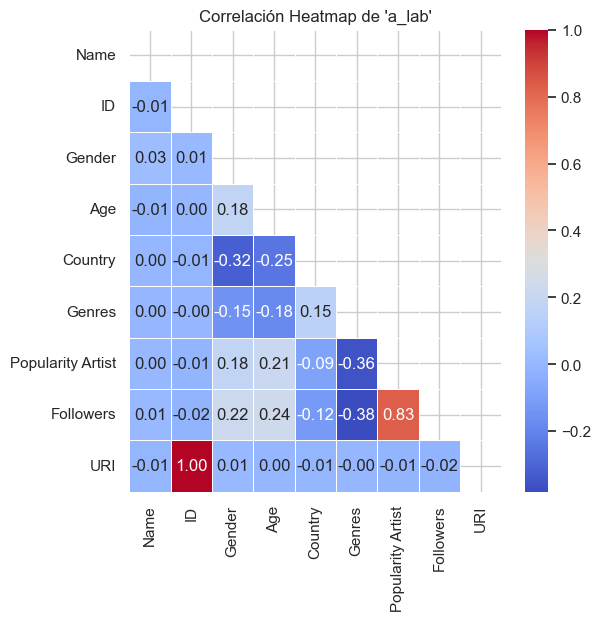

In [189]:
corr_matrix = a_lab.corr()

# Crear una máscara triangular superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear el heatmap con la máscara
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", ax=ax, mask=mask)

plt.title("Correlación Heatmap de 'a_lab'")
plt.show()


- Observamos una relación entre las columnas ID y URI, lo que sugiere la posibilidad de eliminar una de estas columnas para evitar redundancias en el conjunto de datos.

- Además, destacamos una fuerte correlación entre el número de seguidores (Followers) y la popularidad del artista (Popularity Artist). Este resultado es coherente y esperado, ya que artistas con más seguidores tienden a tener una mayor popularidad. Este hallazgo respalda la lógica del comportamiento en plataformas musicales como Spotify.


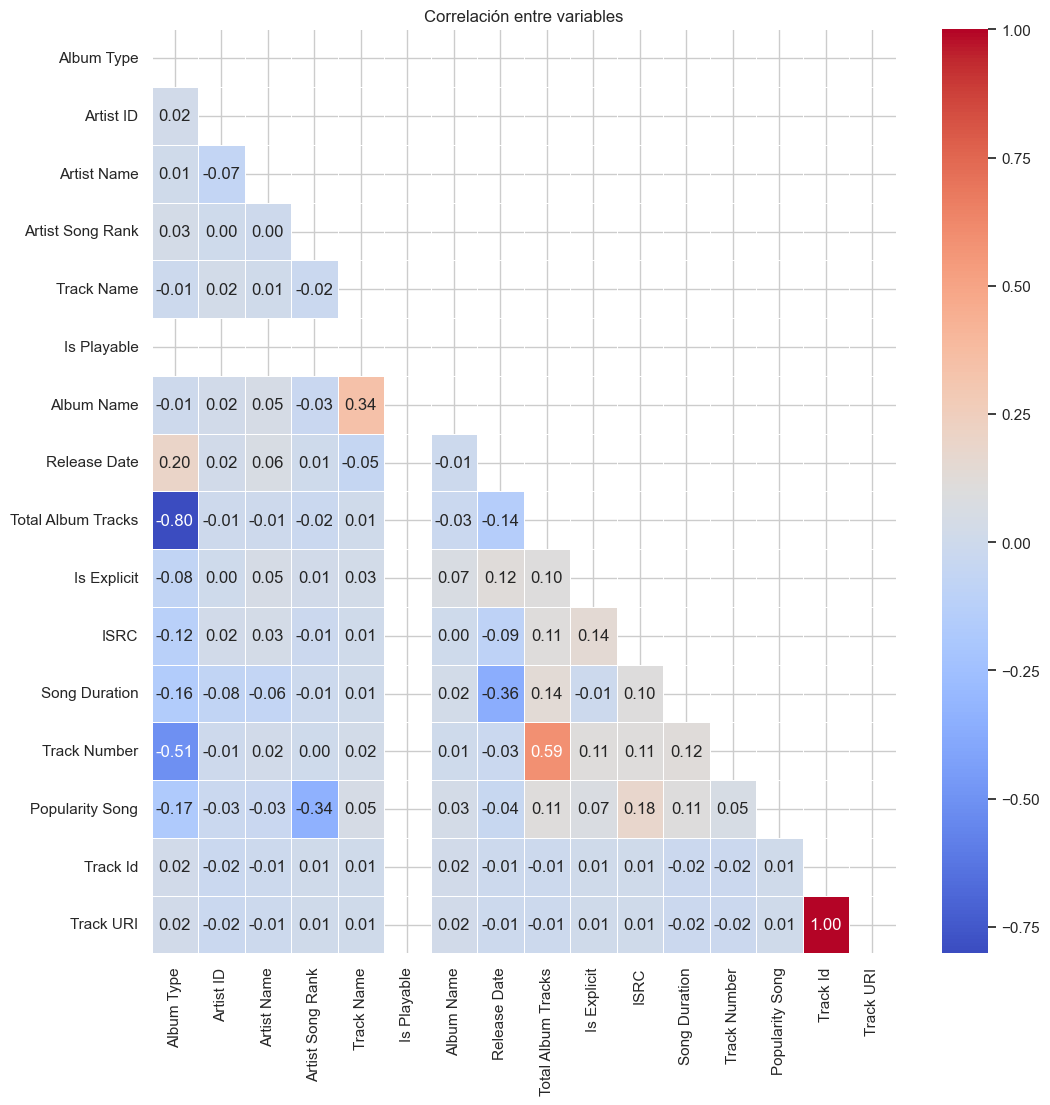

In [190]:
# Crea el heatmap
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 12))

# Calcula la matriz de correlación
corr_matrix = b_lab.corr()

# Enmascara la mitad superior del heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crea el heatmap con la máscara
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", mask=mask, ax=ax)

plt.title("Correlación entre variables")
plt.show()

- Observamos una relación directa entre las columnas Track Id y Track URI, indicando redundancia en la información. Se sugiere la posibilidad de eliminar una de las dos columnas para simplificar el conjunto de datos.

- Adicionalmente, notamos una fuerte correlación entre el número total de pistas de un álbum (Total Album Tracks) y el tipo de álbum (Album Type). Este resultado es coherente, ya que un álbum clasificado como "single" generalmente tiene solo una pista. Considerando esta correlación, podríamos evaluar la eliminación de una de estas columnas para reducir la redundancia de información.

In [191]:
print(a.columns)
print (b.columns)

Index(['Name', 'ID', 'Gender', 'Age', 'Country', 'Genres', 'Popularity Artist',
       'Followers', 'URI'],
      dtype='object')
Index(['Album Type', 'Artist ID', 'Artist Name', 'Artist Song Rank',
       'Track Name', 'Is Playable', 'Album Name', 'Release Date',
       'Total Album Tracks', 'Is Explicit', 'ISRC', 'Song Duration',
       'Track Number', 'Popularity Song', 'Track Id', 'Track URI'],
      dtype='object')


- Después de obtener una visión inicial de las correlaciones principales entre variables en ambos dataframes, podemos realizar un **'merge'** considerando las variables que tienen referencias comunes ('ID' Vs. 'Artist ID'). Este paso permitirá consolidar la información de ambos conjuntos de datos, facilitando análisis más integrados y completos.

In [192]:
# Uno dataframes basados en alguna columna común (por ejemplo, 'ID' en df a y 'Artist ID' en df b)
merged= pd.merge(a, b, left_on='ID', right_on='Artist ID', how='inner')
merged.head(2)

,Name,ID,Gender,Age,Country,Genres,Popularity Artist,Followers,URI,Album Type,...,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU


In [193]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                4037 non-null   object
 1   ID                  4037 non-null   object
 2   Gender              4037 non-null   object
 3   Age                 4037 non-null   int64 
 4   Country             4037 non-null   object
 5   Genres              4037 non-null   object
 6   Popularity Artist   4037 non-null   int64 
 7   Followers           4037 non-null   int64 
 8   URI                 4037 non-null   object
 9   Album Type          4037 non-null   object
 10  Artist ID           4037 non-null   object
 11  Artist Name         4037 non-null   object
 12  Artist Song Rank    4037 non-null   int64 
 13  Track Name          4037 non-null   object
 14  Is Playable         4037 non-null   bool  
 15  Album Name          4037 non-null   object
 16  Release Date        4037

- Hemos obtenido un nuevo dataframe llamado 'merge' con 4037 entradas y 25 columnas. En este proceso, identificamos que varias columnas pueden eliminarse por redundancia o por no ser relevantes para nuestro análisis.

- Aunque algunas redundancias son evidentes, como la repetición de la columna ID, será necesario realizar un análisis más detallado de otras columnas para determinar cuáles deben ser eliminadas y cuáles aportan información valiosa.

In [194]:
merged['Album Type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

- Observamos que la columna 'Album Type' presenta tres tipos diferentes de álbums. Esta información, aunque sugiere la existencia de diversidad en la clasificación de álbums, no será importante considerarla para el estudio de Popularidad de una canción.

**PASO IMPORTANTE: SELECCIÓN DE COLUMNAS PARA EL ESTUDIO**

En el proceso de consolidación de datos, se ha decidido **eliminar** las siguientes columnas:

Todos los ID fuera porque ya tengo el nombre del artista y de la canción. No los necesito:
- 'ID'
- 'URI'
- 'Artist ID'
- 'ISRC'
- 'Track Id'
- 'Track URI'

En el caso de: 
- 'Is Playable' (ya que todas las canciones son reproducibles)
- 'Age' (por falta de fiabilidad)
- 'Album Type' y 'Release Date' (información prescindible para el análisis)

Las elimino porque podemos prescindir para el estudio. 
- Se han conservado todas las demás columnas para su utilización en el análisis subsiguiente.

In [251]:
colSI = ['Gender', 'Country', 'Genres', 'Popularity Artist',
                     'Followers', 'Artist Name', 'Artist Song Rank', 'Track Name',
                     'Album Name', 'Total Album Tracks', 'Is Explicit', 'Song Duration',
                     'Popularity Song']

df = merged.loc[:, colSI]
df.head()

,Gender,Country,Genres,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song
0,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,1,IDGAF (feat. Yeat),For All The Dogs,23,True,260111,93
1,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,2,First Person Shooter (feat. J. Cole),For All The Dogs,23,True,247444,91
2,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),For All The Dogs,23,True,319191,89
3,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,4,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",14,True,218364,89
4,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,5,One Dance,Views,20,False,173986,89


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              4037 non-null   object
 1   Country             4037 non-null   object
 2   Genres              4037 non-null   object
 3   Popularity Artist   4037 non-null   int64 
 4   Followers           4037 non-null   int64 
 5   Artist Name         4037 non-null   object
 6   Artist Song Rank    4037 non-null   int64 
 7   Track Name          4037 non-null   object
 8   Album Name          4037 non-null   object
 9   Total Album Tracks  4037 non-null   int64 
 10  Is Explicit         4037 non-null   bool  
 11  Song Duration       4037 non-null   int64 
 12  Popularity Song     4037 non-null   int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 414.0+ KB


Hay dos columnas que deberé cambiar de formato antes de aplicar el preprocesado. 
- Artist Song Rank, puesto que actualmente está en formato (int64) pero debe ser tratado como una categoría al ser ordinal. Aquí simplemente se aplicará 'ordinal encoder'.
- Is Explicit, porque es un booleano de true y false, que lo convertiré en categoría para usarlo como binario numérico (true=1, false= 0).

### ANÁLISIS EXPLORATORIO DE LOS DATOS  (EDA) ###

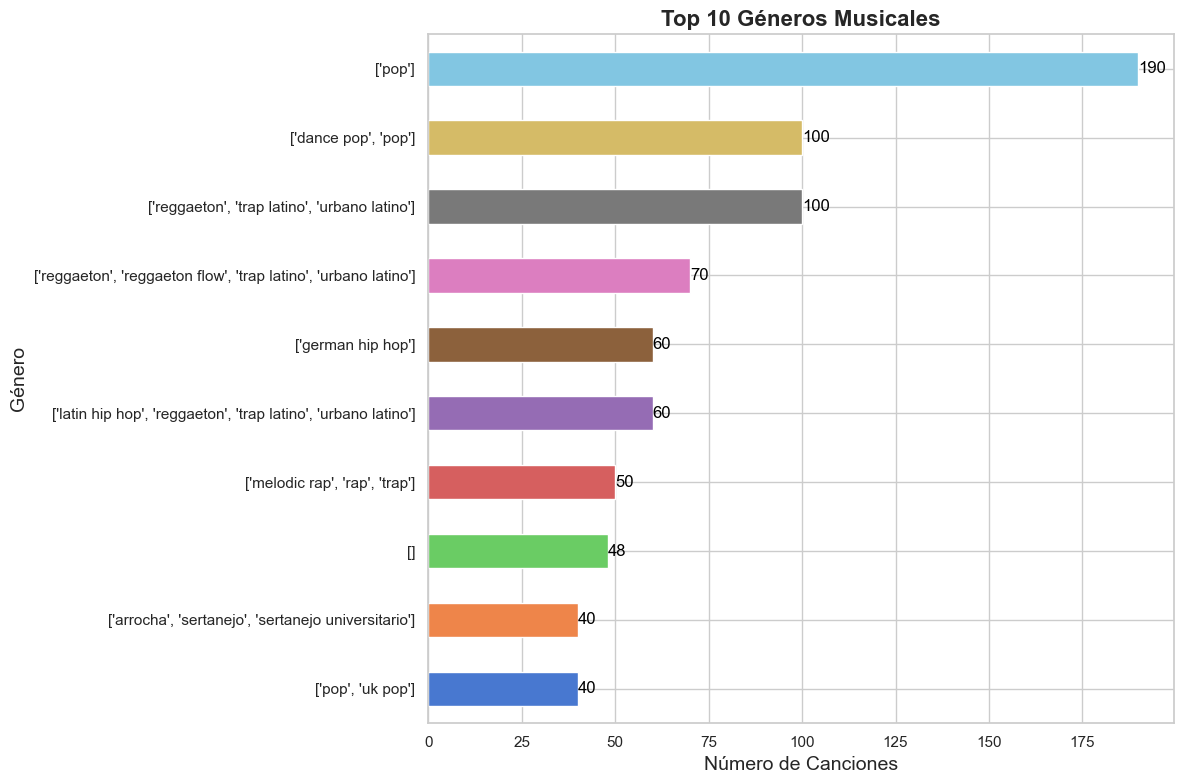

In [197]:
sns.set(style="whitegrid")

# Calcular la cuenta de géneros musicales
genre_counts = df['Genres'].value_counts().head(10)
colors = sns.color_palette("muted", len(genre_counts))
plt.figure(figsize=(12, 8))
bar_plot = genre_counts.sort_values().plot(kind='barh', color=colors)

# Estilizar el gráfico
bar_plot.set_title('Top 10 Géneros Musicales', fontsize=16, fontweight='bold')
bar_plot.set_xlabel('Número de Canciones', fontsize=14)
bar_plot.set_ylabel('Género', fontsize=14)

# Añadir etiquetas de datos a las barras
for index, value in enumerate(genre_counts.sort_values()):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

# Ajustes adicionales para los subgráficos
plt.tight_layout()
plt.show()

Observamos que dentro de los 10 estilos musicales más escuchados en Estados Unidos, el estilo más frecuente es el **POP**, seguido por dance pop en segundo lugar, que es un subgénero dentro del pop. Luego tenemos **reguetón, trap y urbano**, que se encuentran dentro de la categoría de música latina. A continuación, está el **Hip hop**, y luego, con menos frecuencia, el **rap** y otros.

- Investigo el error del octávo género de la lista que sale [vacío].

In [198]:
top_genres = df['Genres'].value_counts().head(10).index.tolist()
print("Top 10 Géneros Musicales:")
for genre in top_genres:
    print("-", genre)

Top 10 Géneros Musicales:
- ['pop']
- ['reggaeton', 'trap latino', 'urbano latino']
- ['dance pop', 'pop']
- ['reggaeton', 'reggaeton flow', 'trap latino', 'urbano latino']
- ['latin hip hop', 'reggaeton', 'trap latino', 'urbano latino']
- ['german hip hop']
- ['melodic rap', 'rap', 'trap']
- []
- ['pop', 'uk pop']
- ['arrocha', 'sertanejo', 'sertanejo universitario']


In [199]:
# Identifico todas las filas con listas vacías en la columna 'Genres'
rows_with_empty_genre = df['Genres'].apply(lambda x: x == '[]')

# Actualizo todas esas filas con "sin clasificar"
df.loc[rows_with_empty_genre, 'Genres'] = 'sin clasificar'

En el conjunto de datos, algunas canciones no tenían información válida sobre su género musical, lo que resultaba en listas vacías en la columna 'Genres' ( [] ). Esto presentaba un inconveniente, ya que estas canciones no estaban clasificadas correctamente según su estilo musical.

He decidido sustituir las listas vacías en la columna 'Genres' con la etiqueta "Sin clasificar". 

In [200]:
# Filtro las filas que contienen 'sin clasificar' en la columna 'Genres'
uncategorized_rows = df[df['Genres'] == 'sin clasificar']
uncategorized_rows

,Gender,Country,Genres,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song
660,male,DE,sin clasificar,41,16145,ZEDDY WILL,1,You,You,1,True,108923,57
661,male,DE,sin clasificar,41,16145,ZEDDY WILL,2,Confidence is Key,Confidence is Key,1,True,129647,47
662,male,DE,sin clasificar,41,16145,ZEDDY WILL,3,"Freak You ""Part 2""","Freak You ""Part 2""",1,False,79530,47
663,male,DE,sin clasificar,41,16145,ZEDDY WILL,4,Cha Cha,Cha Cha,1,True,155471,45
664,male,DE,sin clasificar,41,16145,ZEDDY WILL,5,Dont Know What To Say,Dont Know What To Say,1,True,131016,38
665,male,DE,sin clasificar,41,16145,ZEDDY WILL,6,BOP IT,BOP IT,1,True,118857,36
666,male,DE,sin clasificar,41,16145,ZEDDY WILL,7,"You - Remix feat 2Rare, Kenzo B, DJ Smallz 732","You (Remix feat 2Rare, Kenzo B, DJ Smallz 732)",1,True,158769,36
667,male,DE,sin clasificar,41,16145,ZEDDY WILL,8,Zeddy's Jam (Crank Dat 2023),Zeddy's Jam (Crank Dat 2023),1,True,117983,35
668,male,DE,sin clasificar,41,16145,ZEDDY WILL,9,Blah Blah,Blah Blah,1,True,146600,33
669,male,DE,sin clasificar,41,16145,ZEDDY WILL,10,HIT TS,HIT TS,1,True,175704,29


- Como son pocos Opto por rellenarlos manualmente una vez buscados en internet.

In [201]:
# Relleno manualmente los géneros para los 5 artistas diferentes y corrijo dos países.
df.loc[df['Artist Name'] == 'ZEDDY WILL', 'Genres'] = 'hip hop, rap'
df.loc[df['Artist Name'] == 'SNOW WIFE', 'Genres'] = 'rap, reggae fusion'
df.loc[df['Artist Name'] == 'Nyla', 'Genres'] = 'dancehall'
df.loc[df['Artist Name'] == 'Nyla', 'Country'] = 'JM'
df.loc[df['Artist Name'] == 'Descemer Bueno', 'Genres'] = 'latino, rock español' 
df.loc[df['Artist Name'] == 'WATTS', 'Genres'] = 'rock alternativo'
df.loc[df['Artist Name'] == 'WATTS', 'Country'] = 'US'

In [202]:
# Imprimo una fila por cada artista específico
artists_to_check = ['ZEDDY WILL', 'SNOW WIFE', 'Nyla', 'Descemer Bueno', 'WATTS']
filtered_rows = df[df['Artist Name'].isin(artists_to_check)].drop_duplicates('Artist Name')
print(filtered_rows[['Artist Name', 'Genres', 'Country']])

         Artist Name                Genres Country
660       ZEDDY WILL          hip hop, rap      DE
2453       SNOW WIFE    rap, reggae fusion      CA
3101            Nyla             dancehall      JM
3491  Descemer Bueno  latino, rock español      CU
4027           WATTS      rock alternativo      US


In [203]:
# Identificar todas las filas con listas vacías en la columna 'Genres'
rows_with_empty_genre = df['Genres'].apply(lambda x: x == '[]')

# Actualizar todas esas filas con "sin género"
df.loc[rows_with_empty_genre, 'Genres'] = 'sin género'

In [204]:
df['Genres'].unique()

array(["['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']",
       "['dfw rap', 'melodic rap', 'pop', 'rap']",
       "['pop', 'singer-songwriter pop', 'uk pop']",
       "['reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino']",
       "['reggaeton', 'trap latino', 'urbano latino']",
       "['canadian pop', 'pop']",
       "['puerto rican pop', 'reggaeton', 'trap latino', 'urbano latino']",
       "['pop']", "['pop', 'pop r&b']",
       "['latin hip hop', 'reggaeton', 'trap latino', 'urbano latino']",
       "['hip hop', 'rap', 'slap house']",
       "['canadian contemporary r&b', 'canadian pop', 'pop']",
       "['emo rap', 'miami hip hop', 'rap']", "['art pop', 'pop']",
       "['reggaeton', 'reggaeton flow', 'trap boricua', 'trap latino', 'urbano latino']",
       "['latin pop', 'reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino']",
       "['dance pop', 'pop']", "['dance pop', 'pop', 'uk pop']",
       "['chicago rap', 'melodic rap', 

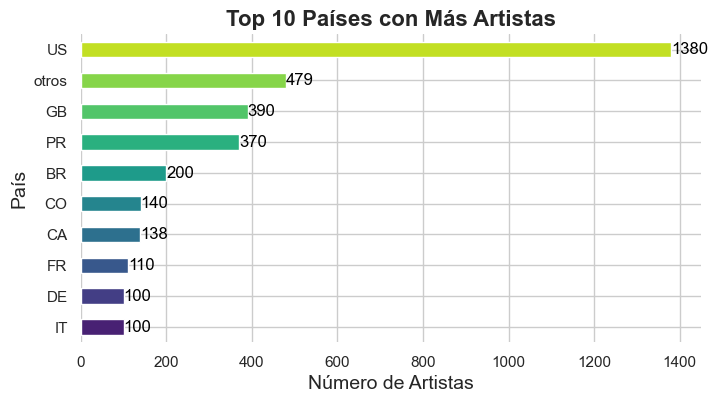

In [205]:
plt.figure(figsize=(8, 4))
# Paleta de colores
colors = sns.color_palette("viridis", 10)
# Gráfico de barras horizontal
bar_plot = df['Country'].value_counts().head(10).sort_values().plot(kind='barh', color=colors)

# Estilizar el gráfico
bar_plot.set_title('Top 10 Países con Más Artistas', fontsize=16, fontweight='bold')
bar_plot.set_xlabel('Número de Artistas', fontsize=14)
bar_plot.set_ylabel('País', fontsize=14)

# Agregar etiquetas de datos al lado de las barras
for index, value in enumerate(df['Country'].value_counts().head(10).sort_values()):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

# Eliminar bordes innecesarios
sns.despine(left=True, bottom=True)
plt.show()


**Procedencia de los Artistas Más Reproducidos en Estados Unidos**

Estas barras representan la procedencia geográfica de los artistas más escuchados en Estados Unidos.

En primer lugar, los artistas más reproducidos son originarios de Estados Unidos, seguidos por artistas de Gran Bretaña. Puerto Rico ocupa la tercera posición, seguido por Brasil, Colombia y Canadá. Los tres últimos países en el top ten son europeos, con Francia, Alemania e Italia.

En otros encontramos un sinfín de procedencias de todo el mundo.

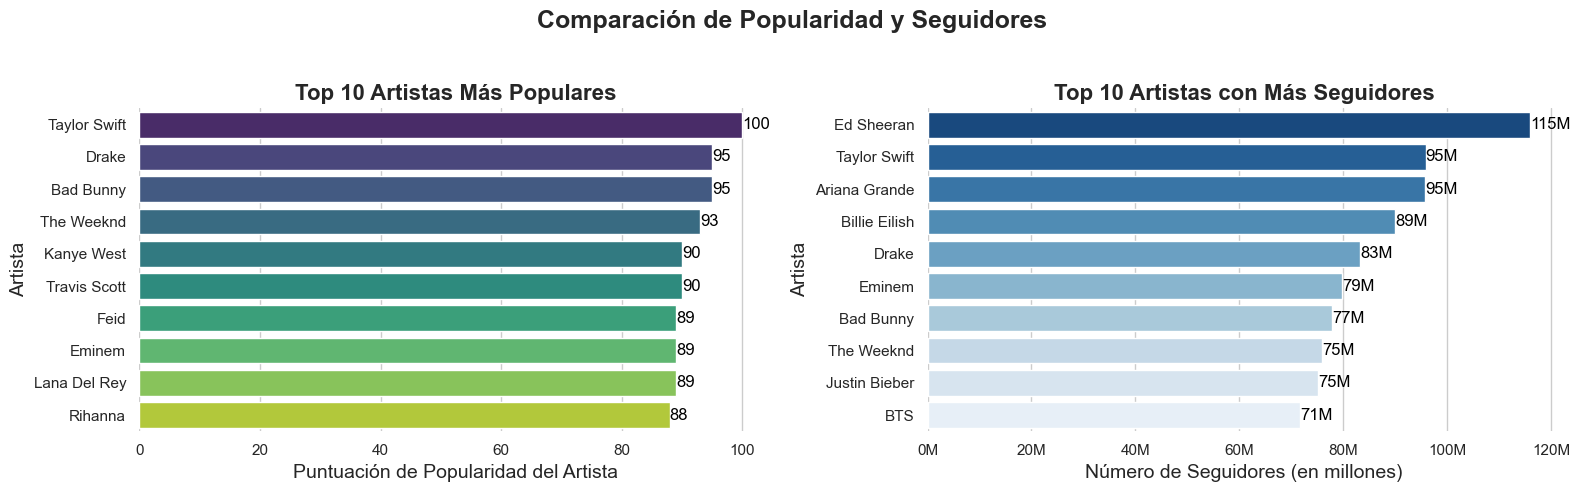

In [206]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
colors_popularity = sns.color_palette("viridis", 10)

# Obtener las filas representativas ordenadas de mayor a menor popularidad
representative_rows = df.groupby('Artist Name', as_index=False)['Popularity Artist', 'Followers'].max()
sorted_rows_popularity = representative_rows.sort_values('Popularity Artist', ascending=False).head(10)

# Gráfico de barras horizontal para popularidad
bar_plot_popularity = sns.barplot(x='Popularity Artist', y='Artist Name', data=sorted_rows_popularity, palette=colors_popularity, ax=axes[0])

# Estilizar el gráfico de popularidad
bar_plot_popularity.set_title('Top 10 Artistas Más Populares', fontsize=16, fontweight='bold')
bar_plot_popularity.set_xlabel('Puntuación de Popularidad del Artista', fontsize=14)
bar_plot_popularity.set_ylabel('Artista', fontsize=14)

# Agregar etiquetas de datos al lado de las barras de popularidad
for index, value in enumerate(sorted_rows_popularity['Popularity Artist']):
    bar_plot_popularity.text(value, index, f'{int(value)}', ha='left', va='center', fontsize=12, color='black')

# Paleta de colores para seguidores
colors_followers = sns.color_palette("Blues_r", 10)

# Obtener las filas representativas ordenadas de mayor a menor seguidores
sorted_rows_followers = representative_rows.sort_values('Followers', ascending=False).head(10)

# Gráfico de barras horizontal para seguidores
bar_plot_followers = sns.barplot(x='Followers', y='Artist Name', data=sorted_rows_followers, palette=colors_followers, ax=axes[1])

# Estilizar el gráfico de seguidores
bar_plot_followers.set_title('Top 10 Artistas con Más Seguidores', fontsize=16, fontweight='bold')
bar_plot_followers.set_xlabel('Número de Seguidores (en millones)', fontsize=14)
bar_plot_followers.set_ylabel('Artista', fontsize=14)

# Convertir los valores del eje x a millones para seguidores
bar_plot_followers.set_xticklabels(['{:,.0f}M'.format(x/1000000) for x in bar_plot_followers.get_xticks()])

# Agregar etiquetas de datos al lado de las barras de seguidores
for index, value in enumerate(sorted_rows_followers['Followers']):
    bar_plot_followers.text(value, index, f'{int(value/1000000)}M', ha='left', va='center', fontsize=12, color='black')

# Ajustes adicionales para los subgráficos
fig.suptitle('Comparación de Popularidad y Seguidores', fontsize=18, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del diseño

# Eliminar bordes innecesarios
sns.despine(left=True, bottom=True)
plt.show()


- La comparación entre la popularidad y la posición en el ranking de seguidores de los artistas revela que no siempre coinciden ambas métricas. Este hallazgo sugiere que un artista puede gozar de gran popularidad y tener muchos seguidores, pero no necesariamente debido a la calidad de su música.

- Tomemos el ejemplo de **Taylor Swift**, quien ocupa una posición destacada en ambos rankings dentro del top ten. Con el primer puesto en popularidad y el segundo lugar con más seguidores, Taylor Swift representa un equilibrio perfecto entre reconocimiento artístico y una base sólida de seguidores. 

- Este fenómeno se repite con otros artistas como Drake, Eminem y The Weeknd, quienes también figuran en ambos rankings top 10.

- En última instancia, este análisis subraya la diversidad de factores que contribuyen a la popularidad de un artista, y cómo la conexión entre la calidad musical y la cantidad de seguidores puede variar significativamente en el panorama musical.

- El ejemplo más extremo: **Ed Sheeran**, que, a pesar de tener tantos seguidores, no está en el top 10 de popularidad.

Es importante considerar que Ed Sheeran es inglés, y el conjunto de datos se enfoca en las preferencias de oyentes en Estados Unidos. Más adelante, exploraremos gráficas que revelarán cómo las canciones de artistas ingleses, aunque ocupen la segunda posición, experimentan un declive significativo en cuanto a la cantidad de canciones.

Otro factor a tener en cuenta podría ser la diversidad de estilos musicales que aborda Ed Sheeran, incluyendo Folk, Rhythm and Blues, y Soul, los cuales no son los géneros dominantes en Estados Unidos.



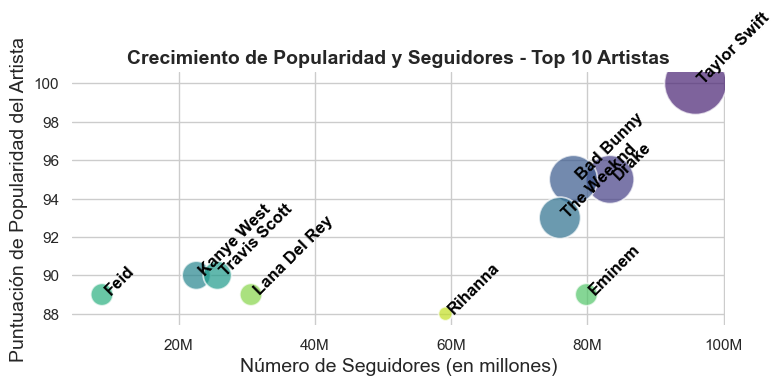

In [207]:
sns.set(style="whitegrid")

# Crear una figura
fig, ax = plt.subplots(figsize=(8, 4))

# Paleta de colores para popularidad y seguidores
colors_popularity = sns.color_palette("viridis", 10)
representative_rows = df.groupby('Artist Name', as_index=False)['Popularity Artist', 'Followers'].max()

# Obtener las filas representativas ordenadas de mayor a menor popularidad y seguidores
sorted_rows_popularity = representative_rows.sort_values('Popularity Artist', ascending=False).head(10)

# Gráfico de dispersión para comparar popularidad y seguidores con puntos más transparentes
scatter_plot = sns.scatterplot(x='Followers', y='Popularity Artist', hue='Artist Name', data=sorted_rows_popularity, 
                               palette=colors_popularity, size='Popularity Artist', sizes=(100, 2000), 
                               alpha=0.7, legend=False, ax=ax)

# Agregar etiquetas de datos a los puntos con nombres inclinados
for line in range(0, len(sorted_rows_popularity)):
     scatter_plot.text(sorted_rows_popularity['Followers'].iloc[line], 
                       sorted_rows_popularity['Popularity Artist'].iloc[line], 
                       sorted_rows_popularity['Artist Name'].iloc[line], 
                       horizontalalignment='left', 
                       size='medium', 
                       color='black', 
                       weight='semibold',
                       rotation=45)  # Inclinar el nombre en 45 grados

# Estilizar el gráfico de dispersión
scatter_plot.set_title('Crecimiento de Popularidad y Seguidores - Top 10 Artistas', fontsize=14, fontweight='bold')
scatter_plot.set_xlabel('Número de Seguidores (en millones)', fontsize=14)
scatter_plot.set_ylabel('Puntuación de Popularidad del Artista', fontsize=14)

# Convertir los valores del eje x a millones para seguidores
scatter_plot.set_xticklabels(['{:,.0f}M'.format(x/1000000) for x in scatter_plot.get_xticks()])

# Ajustar el diseño y eliminar bordes innecesarios
sns.despine(left=True, bottom=True)
fig.tight_layout(rect=[0, 0, 1, 1])  # Ajuste de los márgenes

# Mostrar el gráfico de dispersión
plt.show()


- En el gráfico de dispersión, se facilita la visualización del crecimiento de los artistas: aquellos ubicados en la parte superior derecha destacan, representados por puntos de mayor tamaño. Esta disposición permite identificar patrones y resalta la relación entre las variables analizadas, como la popularidad y el número de seguidores de los artistas.

- Un ejemplo ilustrativo de estas interacciones se evidencia al observar la popularidad de artistas como Bad Bunny y Feid, especialmente cuando han colaborado en una canción. Es innegable que Feid se beneficia de la prominente popularidad de Bad Bunny, que es considerablemente mayor. Estas dinámicas son cuidadosamente estudiadas por las productoras, ya que influyen significativamente en el impacto y éxito de las colaboraciones musicales.

**REAGRUPACIÓN DE ESTILOS MUSICALES**

In [208]:
genres_expanded = df['Genres'].str.split(',', expand=True)
genres_expanded.head()

,0,1,2,3,4,5,6,7
0,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
1,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
2,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
3,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
4,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None


- Observamos que en relación a los estilos, hay muchas clases, pero la mayoría se pueden agrupar en categorías más generales como: POP, HIP HOP, RAP, REGGAETON, HOUSE y ROCK. 

- A continuación, intentaremos agrupar estos estilos más específicos en categorías más amplias para simplificar la clasificación.

Podemos dividir la columna 'Genres' del DataFrame utilizando el método `str.split()`. Este método divide una cadena en función de un delimitador y devuelve un DataFrame con las subcadenas resultantes.

Esto nos permite descomponer la información de géneros musicales que originalmente estaba en una sola columna en varias columnas, lo que facilita el análisis y la comprensión de la distribución de los géneros en nuestro conjunto de datos.

In [209]:
def categorize_genre(genre):
    genre_upper = genre.upper()
    
    if 'POP' in genre_upper:
        return 'Pop'
    elif 'HIP HOP' in genre_upper:
        return 'Hip Hop'
    elif any(keyword in genre_upper for keyword in ['RAP', 'TRAP', 'URBANO']):
        return 'Rap / Trap / Urbano'
    elif any(keyword in genre_upper for keyword in ['REGGAETON', 'REGGATEON FLOW']):
        return 'Reggaetón' 
    elif 'HOUSE' in genre_upper:
        return 'House'
    elif any(keyword in genre_upper for keyword in ['EDM', 'ELECTRO', 'ELECTRONIC']):
        return 'EDM Electro'
    elif 'ROCK' in genre_upper:
        return 'Rock'
    
    return 'Otros'

df['Main Genre'] = df['Genres'].apply(categorize_genre)

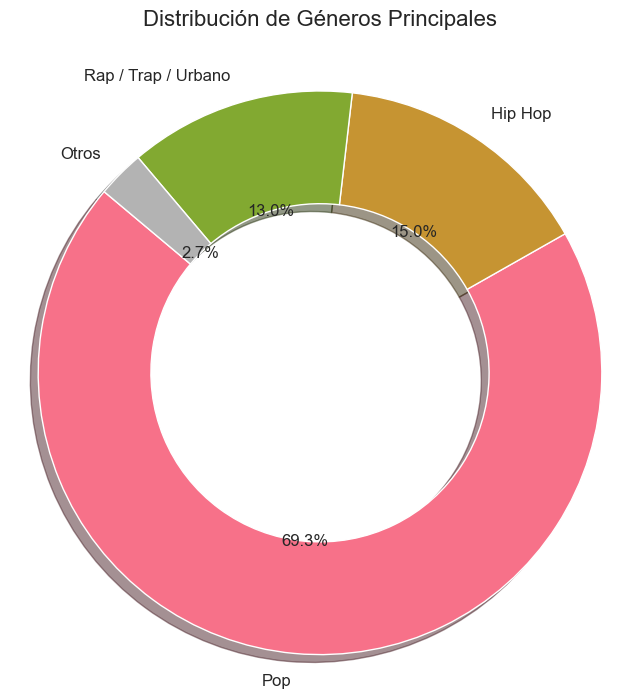

In [210]:
plt.figure(figsize=(8, 8))  # Aumentar el tamaño para una mejor legibilidad

# Obtener el recuento de géneros principales
main_genres_counts = df['Main Genre'].value_counts()

# Paleta de colores más desaturada y con colores contrastantes
colors = sns.color_palette('husl', n_colors=len(main_genres_counts))

# Umbral para agrupar las categorías más pequeñas en "Otros"
umbral = 0.03
small_genres = main_genres_counts[main_genres_counts / main_genres_counts.sum() < umbral]

# Crear una nueva serie con "Otros" y las categorías más pequeñas agrupadas
main_genres_counts_combined = main_genres_counts.copy()
main_genres_counts_combined['Otros'] = main_genres_counts[small_genres.index].sum()
main_genres_counts_combined = main_genres_counts_combined.drop(small_genres.index)

# Nombres específicos para las categorías principales
labels_combined = main_genres_counts_combined.index

# Paleta de colores actualizada con un color para "Otros"
colors_combined = colors[:len(main_genres_counts_combined) - 1] + [(0.7, 0.7, 0.7)]

# Crear el gráfico de pastel con colores mejorados, sombra y etiquetas más grandes
plt.pie(main_genres_counts_combined, 
        labels=labels_combined,  # Nombres específicos para las categorías principales
        autopct='%1.1f%%', 
        colors=colors_combined, 
        startangle=140, 
        shadow=True, 
        wedgeprops=dict(width=0.4, edgecolor='w'),
        textprops={'fontsize': 12})  # Ajustar el tamaño de la fuente de las etiquetas

# Ajustes adicionales para mejorar la legibilidad
plt.axis('equal')  # Relación de aspecto igual para asegurar que el pastel se dibuje como un círculo
plt.title('Distribución de Géneros Principales', fontsize=16, y=1.05)

# Mostrar el gráfico
plt.show()


Es evidente que el género POP es el más predominante, y esto se debe a su amplia amplitud conceptual. Muchas canciones clasificadas en géneros como hip-hop o urbano comparten también la clasificación de POP.

Es interesante destacar que, ya sea por casualidad o intencionalidad, el género POP tiende a ser el más bailable y comercial. Esta característica contribuye a su popularidad tanto en los Estados Unidos como en el resto del mundo. 

Específicamente en plataformas como Spotify, que atraen a un público amplio, se favorece la presencia del género POP. 

En este contexto, se puede apreciar que Spotify no está dirigido exclusivamente a melómanos o a sectores musicales segregados, sino que sirve como un canal popular que abarca una diversidad de gustos musicales.

In [211]:
def categorize_genre(genre):
    genre_upper = genre.upper()
    
    if 'HIP HOP' in genre_upper:
        return 'Hip Hop'
    elif 'LATIN' in genre_upper:
        return 'Latin'
    elif any(keyword in genre_upper for keyword in ['EDM', 'ELECTRO', 'ELECTRONIC']):
        return 'EDM Electro'  
    elif any(keyword in genre_upper for keyword in ['RAP', 'TRAP', 'URBANO','URBAN']):
        return 'Rap / Trap / Urbano'
    elif any(keyword in genre_upper for keyword in ['REGGAETON', 'REGGATEON FLOW']):
        return 'Reggaetón' 
    elif any(keyword in genre_upper for keyword in ['HOUSE', 'DANCE', 'FUNK']):
        return 'House / Dance / Funk'
    elif any(keyword in genre_upper for keyword in ['ROCK', 'INDIE', 'B&R','SOUL','COUNTRY','b&r']):
        return 'Rock / Indie / b&r / Country'
    elif 'POP' in genre_upper:
        return 'Pop'
    return 'Otros'

df['Main Genre'] = df['Genres'].apply(categorize_genre)

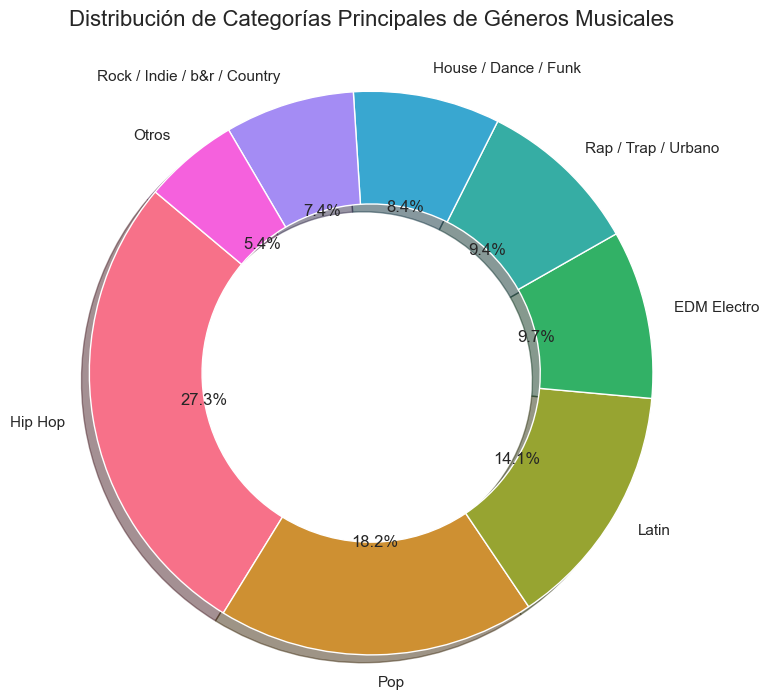

In [212]:
plt.figure(figsize=(8, 8))

# Obtener el recuento de géneros principales
genre_counts = df['Main Genre'].value_counts()

# Paleta de colores
colors = sns.color_palette('husl', n_colors=len(genre_counts))

# Crear el gráfico de quesito con colores mejorados y sombra
plt.pie(genre_counts, 
        labels=genre_counts.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        shadow=True, 
        wedgeprops=dict(width=0.4, edgecolor='w'))

# Ajustes adicionales para mejorar la legibilidad
plt.axis('equal')  # Relación de aspecto igual para asegurar que el pastel se dibuje como un círculo
plt.title('Distribución de Categorías Principales de Géneros Musicales', fontsize=16, y=1.05)

# Mostrar el gráfico
plt.show()


Al observar los datos, notamos que al restringir la categoría POP solo a casos donde no está mezclado con otros estilos, el porcentaje disminuye significativamente. En esta clasificación, hemos agrupado algunos estilos musicales de la siguiente manera:

- Rock, indie, country, y R&B.
- House, dance, y funk.
- Rap, trap, y urbano.
- En la categoría 'otros', incluimos principalmente géneros populares como sertanejo, arrocha, vallenato, rancheras, entre otros.

Esta agrupación nos proporciona una perspectiva sobre los estilos musicales secundarios. Sin embargo, es importante tener en cuenta que el género **POP sigue siendo el más común en Spotify** y el estilo con mayor audiencia en los Estados Unidos

In [213]:
otros_categories = set(df[df['Main Genre'] == 'Otros']['Genres'].apply(lambda x: str(x)))
print(otros_categories)

{"['arrocha', 'sertanejo', 'sertanejo universitario']", "['afrobeats', 'azonto']", "['reggae fusion']", "['mariachi', 'musica mexicana', 'ranchera']", 'Opera', "['aussietronica']", "['banda', 'musica mexicana', 'norteno', 'sad sierreno', 'sierreno']", "['vallenato', 'vallenato moderno']", "['agronejo', 'arrocha', 'sertanejo', 'sertanejo universitario']", "['arrocha', 'forro', 'sertanejo', 'sertanejo universitario']", "['hollywood']", "['ccm', 'worship']", "['sertanejo']", "['melbourne bounce']", "['opm']", "['movie tunes']", "['banda']"}


In [214]:
df.drop('Genres', axis=1, inplace=True)

In [215]:
df.head(2)

,Gender,Country,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song,Main Genre
0,male,CA,95,83298497,Drake,1,IDGAF (feat. Yeat),For All The Dogs,23,True,260111,93,Hip Hop
1,male,CA,95,83298497,Drake,2,First Person Shooter (feat. J. Cole),For All The Dogs,23,True,247444,91,Hip Hop


In [216]:
df['Main Genre'].unique()

array(['Hip Hop', 'Rap / Trap / Urbano', 'Pop', 'Latin',
       'House / Dance / Funk', 'EDM Electro',
       'Rock / Indie / b&r / Country', 'Otros'], dtype=object)

In [217]:
df.describe().round(1)

,Popularity Artist,Followers,Artist Song Rank,Total Album Tracks,Song Duration,Popularity Song
count,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0
mean,72.7,11442879.4,5.5,11.1,205170.7,69.0
std,9.8,16289974.5,2.9,8.5,50585.2,13.1
min,4.0,408.0,1.0,1.0,47354.0,0.0
25%,67.0,2151143.0,3.0,1.0,173419.0,62.0
50%,74.0,6310299.0,5.0,12.0,199746.0,71.0
75%,79.0,12117984.0,8.0,16.0,228000.0,78.0
max,100.0,115998928.0,10.0,165.0,682816.0,99.0


- Tengo una preocupación respecto a ciertos valores, como la cantidad de pistas en un álbum, donde, aunque la mayoría de los datos se encuentran dentro del percentil 75% con alrededor de 16 pistas, existe una discrepancia significativa en el valor máximo que alcanza los 165. 

- Para abordar este comportamiento, planeo desagregar los valores y examinar más de cerca esta variabilidad. Esta desagregación permitirá identificar posibles valores atípicos y evaluar su impacto en la distribución general de los datos. 

- De esta manera, podré tomar medidas específicas, como la aplicación de técnicas de preprocesamiento o la exclusión de valores extremos, para mejorar la calidad y la interpretabilidad de los datos en relación con la cantidad de pistas en los álbumes.

In [218]:
df['Gender'].unique()

array(['male', 'female', 'mixed', 'other', 'desconocido'], dtype=object)

- Saco una lista de las canciones en el Rank 1 de cada artista, ordenada por popularidad canción.

In [219]:
canciones_rank_1 = df[df['Artist Song Rank'] == 1]
canciones_rank_1_ordenadas = canciones_rank_1.sort_values(by='Popularity Song', ascending=False).head(20)
canciones_rank_1_ordenadas

,Gender,Country,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song,Main Genre
3021,female,US,83,9597639,Mariah Carey,1,All I Want for Christmas Is You,Merry Christmas,10,False,241106,99,Rap / Trap / Urbano
550,female,US,100,95859165,Taylor Swift,1,Cruel Summer,Lover,18,False,178426,99,Pop
40,male,PR,95,77931484,Bad Bunny,1,PERRO NEGRO,nadie sabe lo que va a pasar mañana,22,True,162767,97,Latin
1753,male,CO,89,8720100,Feid,1,PERRO NEGRO,nadie sabe lo que va a pasar mañana,22,True,162767,97,Latin
1193,male,PR,85,13527025,Myke Towers,1,LALA,LA VIDA ES UNA,23,True,197920,95,Latin
70,female,US,88,95710972,Ariana Grande,1,Santa Tell Me,Santa Tell Me,1,False,204093,95,Pop
360,male,US,83,35223255,Marshmello,1,HARLEY QUINN,Pa las Baby's Y Belikeada,30,True,143327,95,EDM Electro
130,female,US,86,89957369,Billie Eilish,1,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,1,False,222369,94,Pop
110,male,CA,93,75945958,The Weeknd,1,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Idol Episode 4 (Music from the HBO Origina...,3,False,244684,94,Pop
1073,male,GB,83,30523224,Harry Styles,1,As It Was,Harry's House,13,False,167303,94,Pop


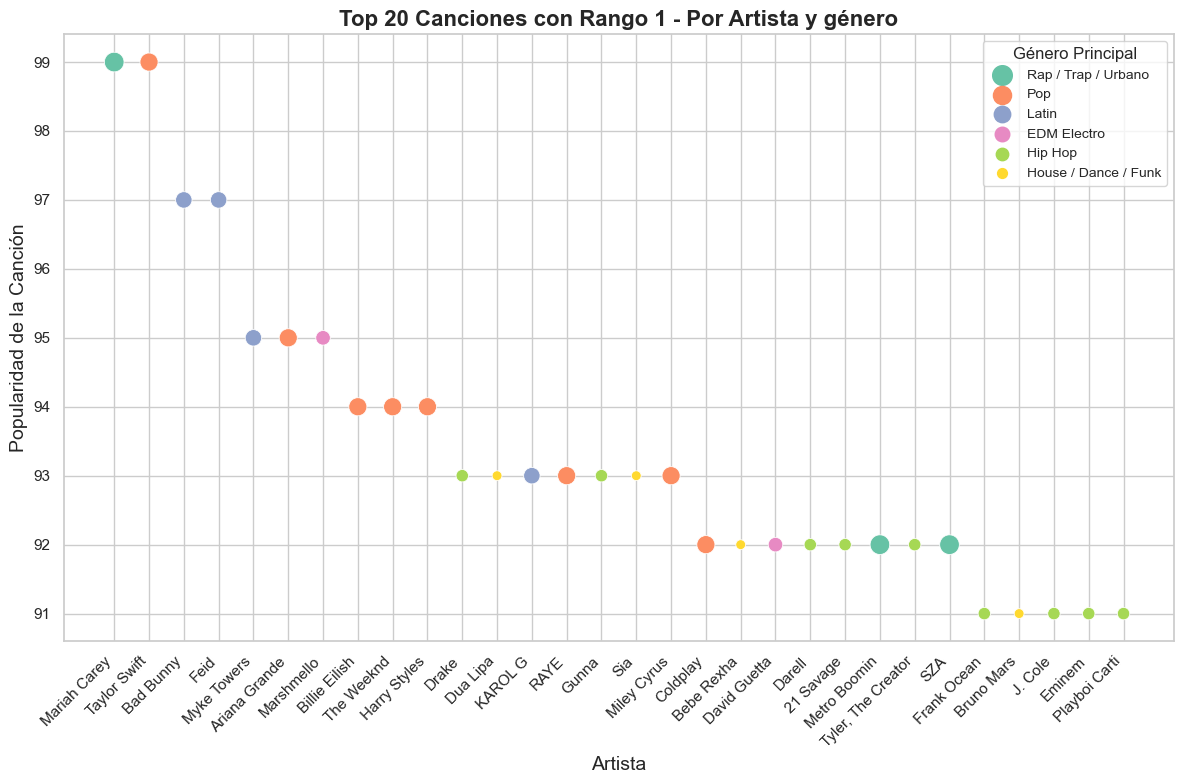

In [220]:
# Filtrar canciones por rango 1 y ordenar por popularidad de manera descendente
canciones_rank_1 = df[df['Artist Song Rank'] == 1]
top_20_canciones = canciones_rank_1.sort_values(by='Popularity Song', ascending=False).head(30)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de burbujas para el top 30
plt.figure(figsize=(12, 8))
bubble_plot_top_20 = sns.scatterplot(x='Artist Name', y='Popularity Song', size='Main Genre', data=top_20_canciones, sizes=(50, 200), hue='Main Genre', palette='Set2')

# Estilizar el gráfico
bubble_plot_top_20.set_title('Top 20 Canciones con Rango 1 - Por Artista y género', fontsize=16, fontweight='bold')
bubble_plot_top_20.set_xlabel('Artista', fontsize=14)
bubble_plot_top_20.set_ylabel('Popularidad de la Canción', fontsize=14)

# Mostrar la leyenda en la esquina superior derecha
plt.legend(title='Género Principal', title_fontsize='12', fontsize='10', loc='upper right')

# Ajustes adicionales para los subgráficos
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


- Esta representación gráfica muestra las canciones clasificadas en el puesto número 1 de cada artista, del top 20 de canciones más populares.

- Proporciona una perspectiva detallada sobre la relación entre la popularidad de las canciones individuales y la posición general de los artistas en la escena musical.

- Es crucial tener en cuenta que, en algunos casos, el género musical asociado al artista, no es el de una canción específica. Como se evidencia, por ejemplo, en la canción de Navidad de Mariah Carey que, gana popularidad durante la temporada navideña de diciembre pero que no sería género musical urbano y en otras fechas no se reflejaría entre las canciones más escuchadas.

- Bad Bunny y Feid compiten con la misma canción, la cual ambos han posicionado en el puesto número 1 de su propio ranking. Y por eso la popularidad de la canción es la misma. 

- Al observar la gráfica, notamos que a medida que baja la popularidad de la canción, hay más cantidad de canciones. Esto sugiere que alcanzar un punto más alto en popularidad se vuelve más desafiante cuando ya se está en la cima. 

- También es interesante destacar que los géneros predominantes en las canciones con más popularidad son el pop y latino, mientras que los estilos de trap y hip hop parecen ser más secundarias.  

Es fundamental recordar que estas observaciones se basan en una única canción por artista. Esto explica la naturaleza escalonada de la gráfica, ya que representa la canción más popular de cada artista según su propio ranking.

Es por ese motivo que ahora procederé a mostrar una comparativa entre las gráficas de canciones menos populares versus las más populares, proporcionando una visión algo distinta.

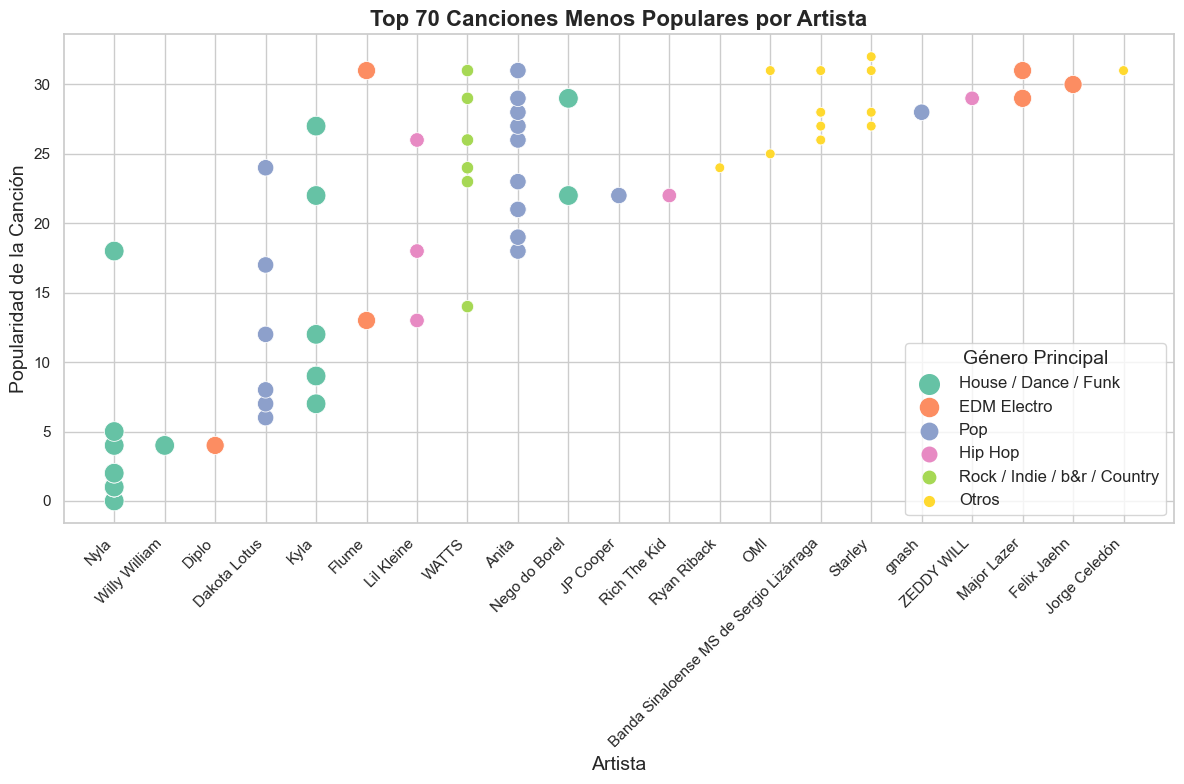

In [221]:
# Filtrar todas las canciones (sin importar el rango) y ordenar por popularidad de manera ascendente
canciones_menos_populares = df.sort_values(by='Popularity Song').head(70)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de burbujas para las 50 canciones menos populares
plt.figure(figsize=(12, 8))
bubble_plot_menos_populares = sns.scatterplot(x='Artist Name', y='Popularity Song', size='Main Genre', data=canciones_menos_populares, sizes=(50, 200), hue='Main Genre', palette='Set2')

# Estilizar el gráfico
bubble_plot_menos_populares.set_title('Top 70 Canciones Menos Populares por Artista', fontsize=16, fontweight='bold')
bubble_plot_menos_populares.set_xlabel('Artista', fontsize=14)
bubble_plot_menos_populares.set_ylabel('Popularidad de la Canción', fontsize=14)

# Mostrar la leyenda en la esquina inferior derecha con un tamaño de fuente más grande
plt.legend(title='Género Principal', title_fontsize='14', fontsize='12', loc='lower right')

# Ajustes adicionales para los subgráficos
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()



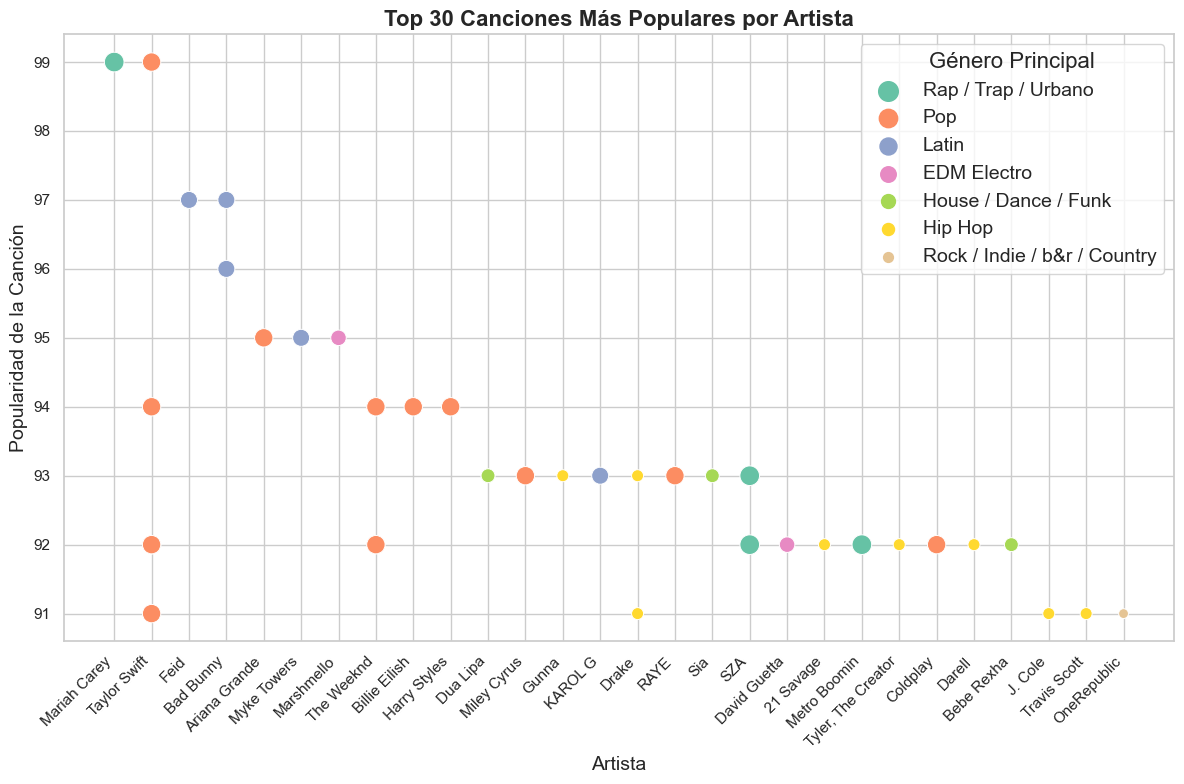

In [222]:
# Filtrar todas las canciones (sin importar el rango) y ordenar por popularidad de manera descendente
canciones_mas_populares = df.sort_values(by='Popularity Song', ascending=False).head(40)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de burbujas para las 40 canciones más populares
plt.figure(figsize=(12, 8))
bubble_plot_mas_populares = sns.scatterplot(x='Artist Name', y='Popularity Song', size='Main Genre', data=canciones_mas_populares, sizes=(50, 200), hue='Main Genre', palette='Set2')

# Estilizar el gráfico
bubble_plot_mas_populares.set_title('Top 30 Canciones Más Populares por Artista', fontsize=16, fontweight='bold')
bubble_plot_mas_populares.set_xlabel('Artista', fontsize=14)
bubble_plot_mas_populares.set_ylabel('Popularidad de la Canción', fontsize=14)

# Mostrar la leyenda en la esquina superior derecha con un tamaño de fuente el doble de grande
plt.legend(title='Género Principal', title_fontsize='16', fontsize='14', loc='upper right')

# Ajustes adicionales para los subgráficos
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


- Es fascinante comparar estas dos gráficas: mientras que en las canciones menos populares tienden a pertenecer mayormente a un mismo artista, en el caso contrario, con las canciones más populares, esta tendencia no es tan evidente y se distribuyen de manera más equitativa entre varios artistas. Estamos analizando 70 canciones con poca popularidad que pertenecen a 20 artistas distintos Vs 30 canciones máxima popularidad que pertenecen a unos 20 .

- Los colores utilizados permiten identificar rápidamente los géneros a los que pertenecen las canciones más populares, destacando especialmente el **pop y el latino**. En cambio, en el caso de las canciones menos populares, se observa una mayor diversidad de estilos, incluyendo hip hop, rock, y otros, aunque mezclados con el omnipresente pop que abarca todos los rangos de popularidad.

Esta comparación proporciona una visión interesante de cómo la distribución de popularidad y diversidad de artistas se manifiesta en las dos categorías de canciones.

- **Visualización de HISTOGRAMAS para observar si las variables numéricas tienen curva gausiana...**

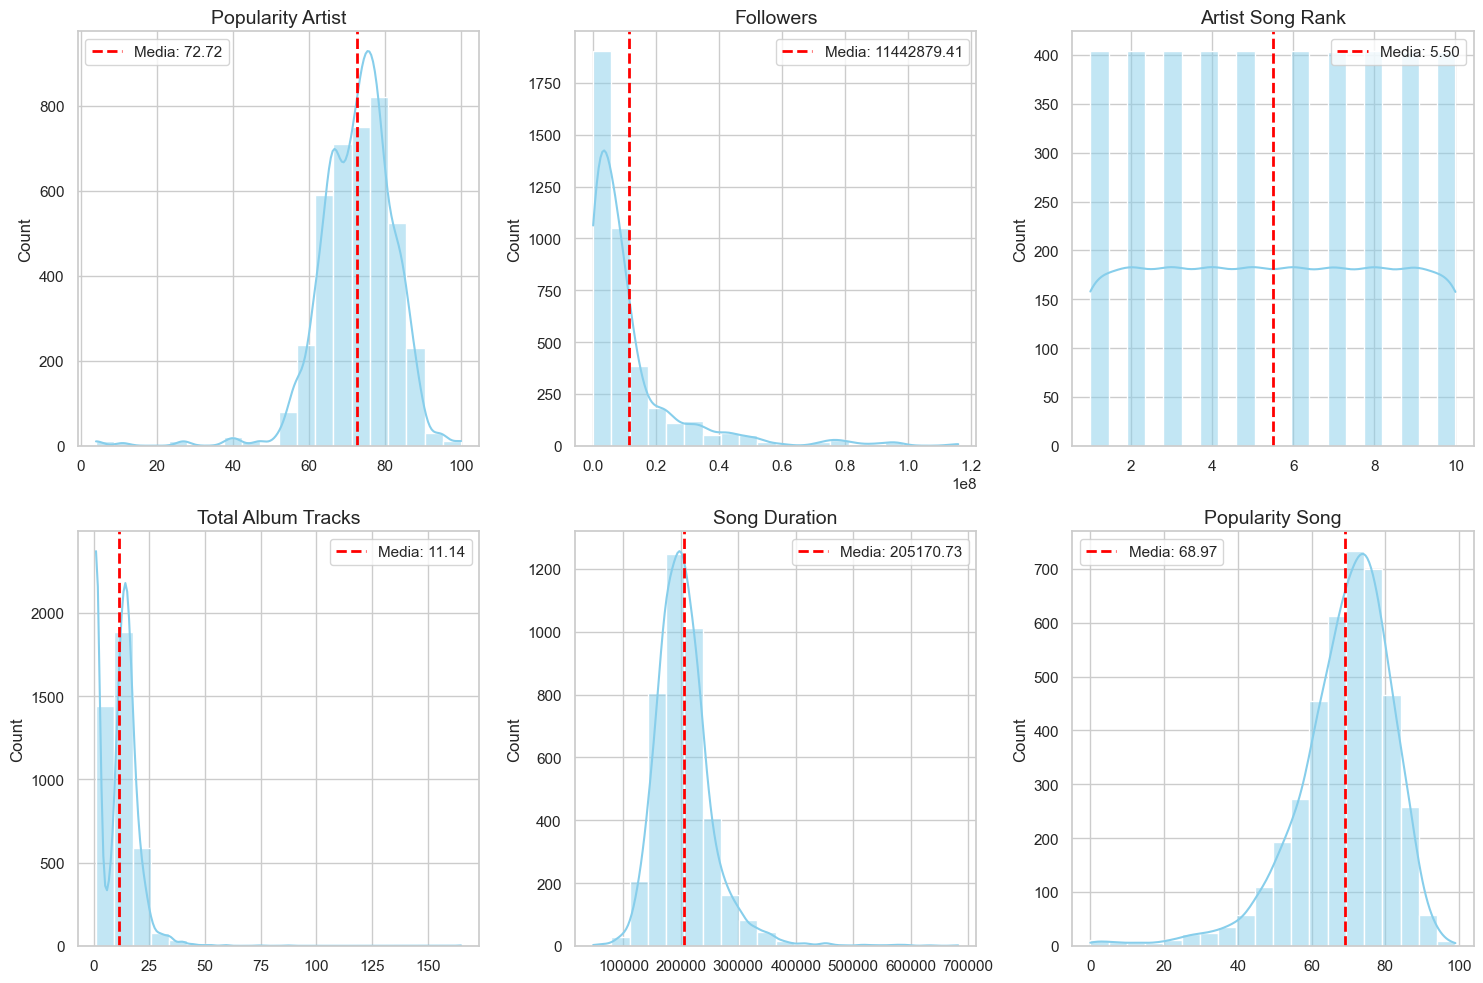

In [223]:
num_cols = ['Popularity Artist', 'Followers', 'Artist Song Rank', 'Total Album Tracks', 'Song Duration', 'Popularity Song']

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Histogramas utilizando Seaborn
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    
    # Agregar línea roja para la media
    mean_value = df[col].mean()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
    
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.legend()

# Ajustes de diseño
plt.tight_layout()
plt.show()


- Observamos que ninguna variable sigue una distribución normal. Y que artist song rank es tratada como una categórica puesto que define una posición ordinal del 1-10

- La asimetría y la falta de distribución normal en los datos suelen estar asociadas a la presencia de valores atípicos (colas de distribución a la derecha o izquierda del gráfico).

- Esto nos indica que es apropiado realizar un preprocesamiento adicional en los datos para abordar la asimetría antes de aplicar los modelos de machine learning, como la estandarización, normalización o la aplicación de transformaciones específicas.

- También será beneficioso aplicar transformaciones a los datos, como la raíz cuadrada o el logaritmo.

- Es importante tener en cuenta que, al elegir modelos, Random Forests o Gradient Boosted Trees son preferibles, ya que tienden a ser menos sensibles a la distribución de los datos en comparación con modelos lineales.

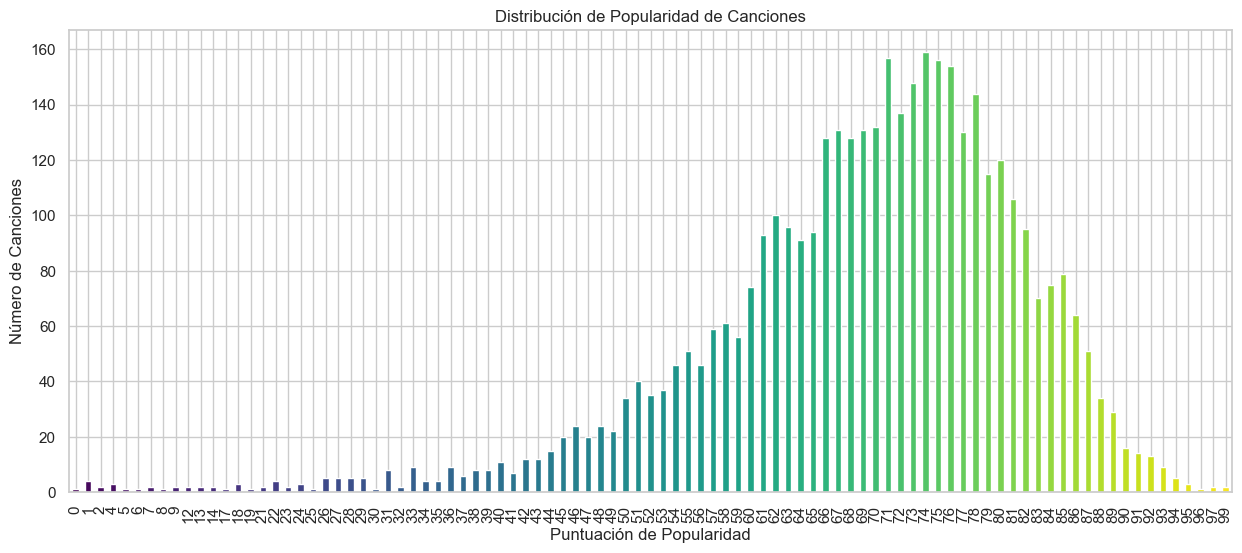

In [224]:
sns.set(style="whitegrid")

# Gráfico de barras para Popularity Song con ajustes visuales
plt.figure(figsize=(15, 6))
popularity_counts = df['Popularity Song'].value_counts().sort_index()
popularity_counts.plot(kind='bar', color=sns.color_palette("viridis", len(popularity_counts)))
plt.title('Distribución de Popularidad de Canciones')
plt.xlabel('Puntuación de Popularidad')
plt.ylabel('Número de Canciones')
plt.show()


- Destacamos que los picos más prominentes en la cantidad de canciones se encuentran en el rango de popularidad entre el 71% y el 78%. Esto sugiere que es relativamente común tener una popularidad moderada en comparación con los extremos de baja o alta popularidad.

- Además, observamos que obtener una baja puntuación de popularidad (a la izquierda de la gráfica) es más complicado que alcanzar una alta popularidad (a la derecha), lo que indica que mantenerse en la mediocridad puede ser más fácil que destacar excepcionalmente.

Es evidente que la audiencia tiende a ser más benevolente en sus calificaciones cuando no le gusta una canción, otorgando puntuaciones más altas. En cambio, obtener una puntuación cercana al rango más alto (97%) es un logro más desafiante y menos común.

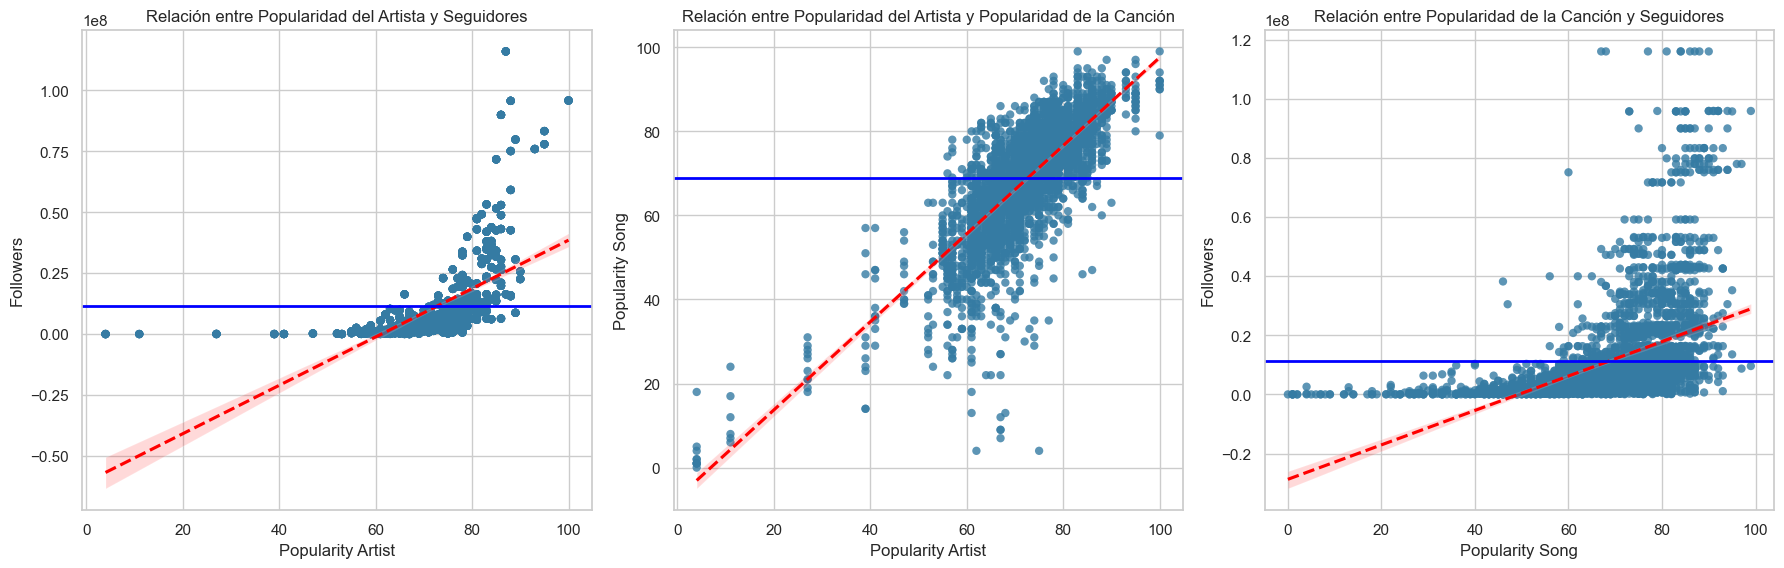

In [225]:
sns.set(style="whitegrid")

# Crear una figura con subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Mapa de colores Mako
cmap = sns.color_palette('mako', as_cmap=True)

# Gráfico de dispersión para 'Popularity Artist' y 'Followers'
sns.regplot(x='Popularity Artist', y='Followers', data=df, ax=axs[0], scatter_kws={'color': cmap(0.5, alpha=0.5), 'edgecolor': 'none'}, line_kws={'color': 'red', 'linestyle': '--'})
axs[0].axhline(df['Followers'].mean(), color='blue', linestyle='-', linewidth=2)  # Línea horizontal para la media
axs[0].set_xlabel('Popularity Artist')
axs[0].set_ylabel('Followers')
axs[0].set_title('Relación entre Popularidad del Artista y Seguidores')

# Gráfico de dispersión para 'Popularity Artist' y 'Popularity Song'
sns.regplot(x='Popularity Artist', y='Popularity Song', data=df, ax=axs[1], scatter_kws={'color': cmap(0.5, alpha=0.5), 'edgecolor': 'none'}, line_kws={'color': 'red', 'linestyle': '--'})
axs[1].axhline(df['Popularity Song'].mean(), color='blue', linestyle='-', linewidth=2)  # Línea horizontal para la media
axs[1].set_xlabel('Popularity Artist')
axs[1].set_ylabel('Popularity Song')
axs[1].set_title('Relación entre Popularidad del Artista y Popularidad de la Canción')

# Gráfico de dispersión para 'Popularity Song' y 'Followers'
sns.regplot(x='Popularity Song', y='Followers', data=df, ax=axs[2], scatter_kws={'color': cmap(0.5, alpha=0.5), 'edgecolor': 'none'}, line_kws={'color': 'red', 'linestyle': '--'})
axs[2].axhline(df['Followers'].mean(), color='blue', linestyle='-', linewidth=2)  # Línea horizontal para la media
axs[2].set_xlabel('Popularity Song')
axs[2].set_ylabel('Followers')
axs[2].set_title('Relación entre Popularidad de la Canción y Seguidores')

# Ajustes de diseño
plt.tight_layout()
plt.show()


- Es interesante observar la relación entre las variables y cómo afectan la popularidad de una canción. La correlación positiva entre la popularidad del artista, la popularidad de la canción y el número de seguidores es comprensible y podría deberse a la reputación y el alcance del artista, que naturalmente impactan en la recepción de sus canciones.

- Sin embargo, la cercanía menos evidente entre el número de seguidores y la popularidad de la canción podría indicar que la popularidad de una canción no está completamente determinada por la magnitud de la base de seguidores del artista. Aquí hay algunas interpretaciones y sugerencias para profundizar en este fenómeno

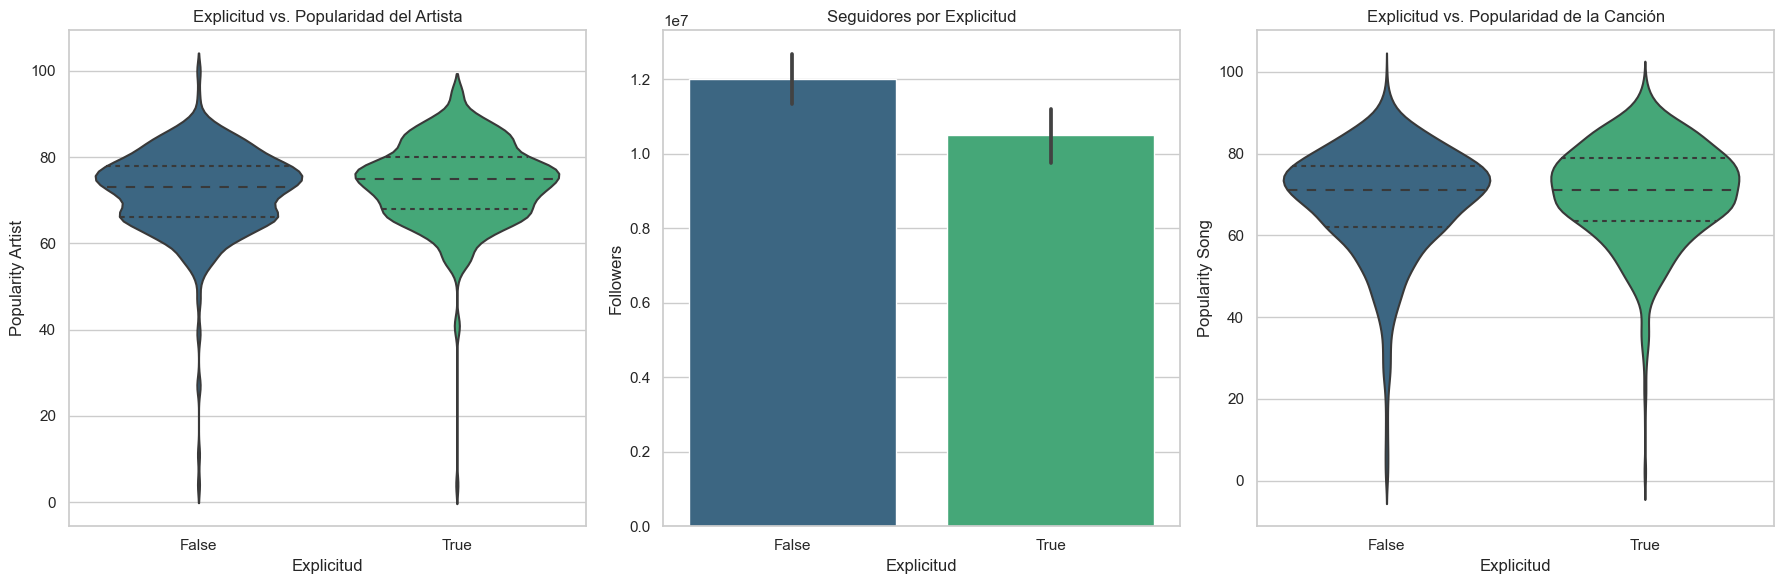

In [226]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de violín para comparar la explicitud con la popularidad del artista
sns.violinplot(x='Is Explicit', y='Popularity Artist', data=df, ax=axs[0], inner='quartile', palette='viridis', marker='o', markersize=6)
axs[0].set_title('Explicitud vs. Popularidad del Artista')
axs[0].set_xlabel('Explicitud')
axs[0].set_ylabel('Popularity Artist')

# Gráfico de barras para comparar la explicitud con la cantidad de seguidores
sns.barplot(x='Is Explicit', y='Followers', data=df, ax=axs[1], palette='viridis')
axs[1].set_title('Seguidores por Explicitud')
axs[1].set_xlabel('Explicitud')
axs[1].set_ylabel('Followers')

# Gráfico de violín para comparar la explicitud con la popularidad de la canción
sns.violinplot(x='Is Explicit', y='Popularity Song', data=df, ax=axs[2], inner='quartile', palette='viridis', marker='o', markersize=6)
axs[2].set_title('Explicitud vs. Popularidad de la Canción')
axs[2].set_xlabel('Explicitud')
axs[2].set_ylabel('Popularity Song')

plt.tight_layout()
plt.show()


- Como podemos observar, el hecho de que un artista componga canciones con contenido explícito no parece aumentar necesariamente su popularidad. Lo mismo se aplica tanto al contenido explícito de la canción como al número de seguidores del artista. 

- De hecho, en el caso del número de seguidores ('Followers'), parece que la relación podría ser inversa, ya que hay artistas con menor popularidad que tienen un mayor número de seguidores. 

- Estos hallazgos sugieren que la popularidad de una canción y la cantidad de seguidores de un artista pueden depender de otros factores, y la presencia de contenido explícito no parece ser un impulsor significativo por sí solo.

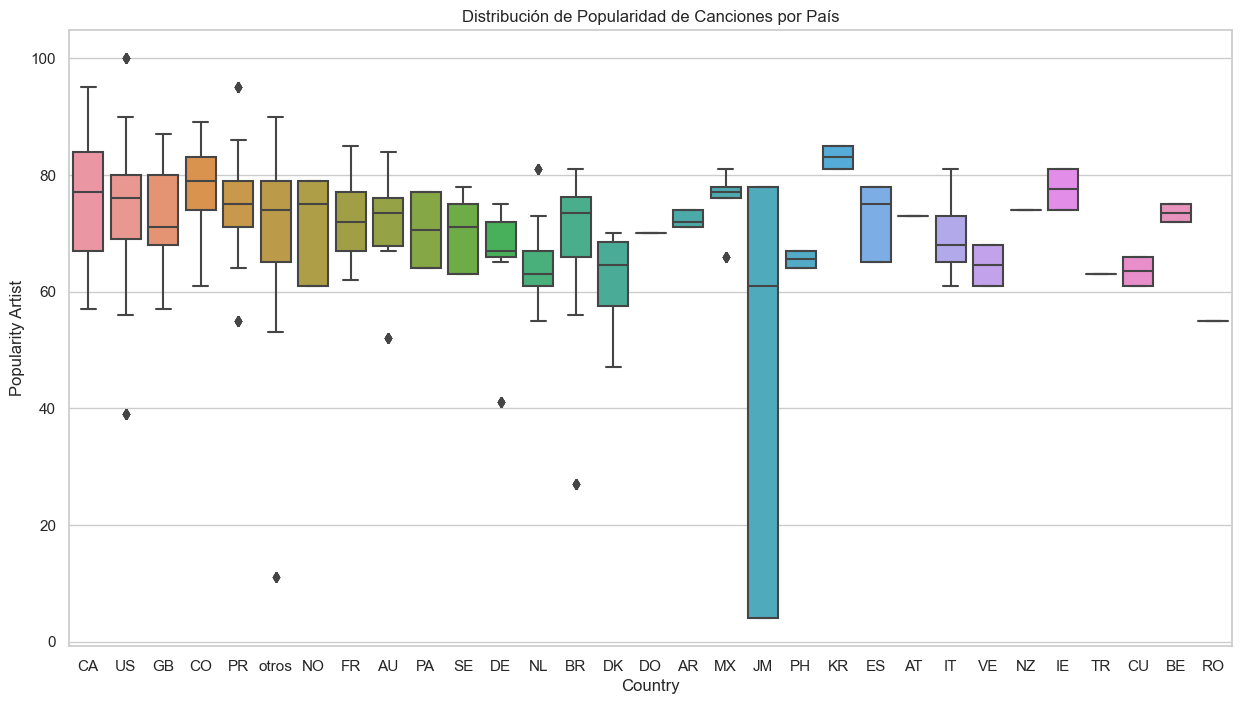

In [227]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Popularity Artist', data=df)
plt.title('Distribución de Popularidad de Canciones por País')
plt.show()


**Países con más rango y menos rango:**

***Más Rango:***

**Estados Unidos (US):** Tiene la mayor variabilidad en la popularidad, con un rango de 56 a 100. Esto puede deberse a que cuenta con la mayor cantidad de artistas, lo cual contribuye a una mayor variación en la popularidad.

***Menos Rango:***

**Austria (AT), República Dominicana (DO), Nueva Zelanda (NZ):** Tienen un rango de popularidad de 0. Esto es porque solo contiene un artista por país.

**Países con más popularidad de artistas y menos popularidad:**

***Más Popularidad:***

**Corea del Sur (KR):** Con una popularidad media de 83, Corea del Sur destaca como un país donde las canciones tienen una alta valoración general. Sin embargo, hay que tener en cuenta que este resultado está influenciado por la presencia de solo dos artistas en el conjunto de datos.

***Menos Popularidad:***

**Rumanía (RO):** Con la popularidad más baja de 55, Rumanía puede tener una escena musical menos conocida o un único artista con una base de seguidores más limitada.

**Otros Países (otros):** Esta categoría, que agrupa a países no clasificados o sin datos específicos, muestra una variabilidad significativa en la popularidad. Puede reflejar una diversidad de estilos y preferencias musicales, ya que abarca una amplia gama de valores de popularidad, desde canciones menos populares hasta canciones muy populares.


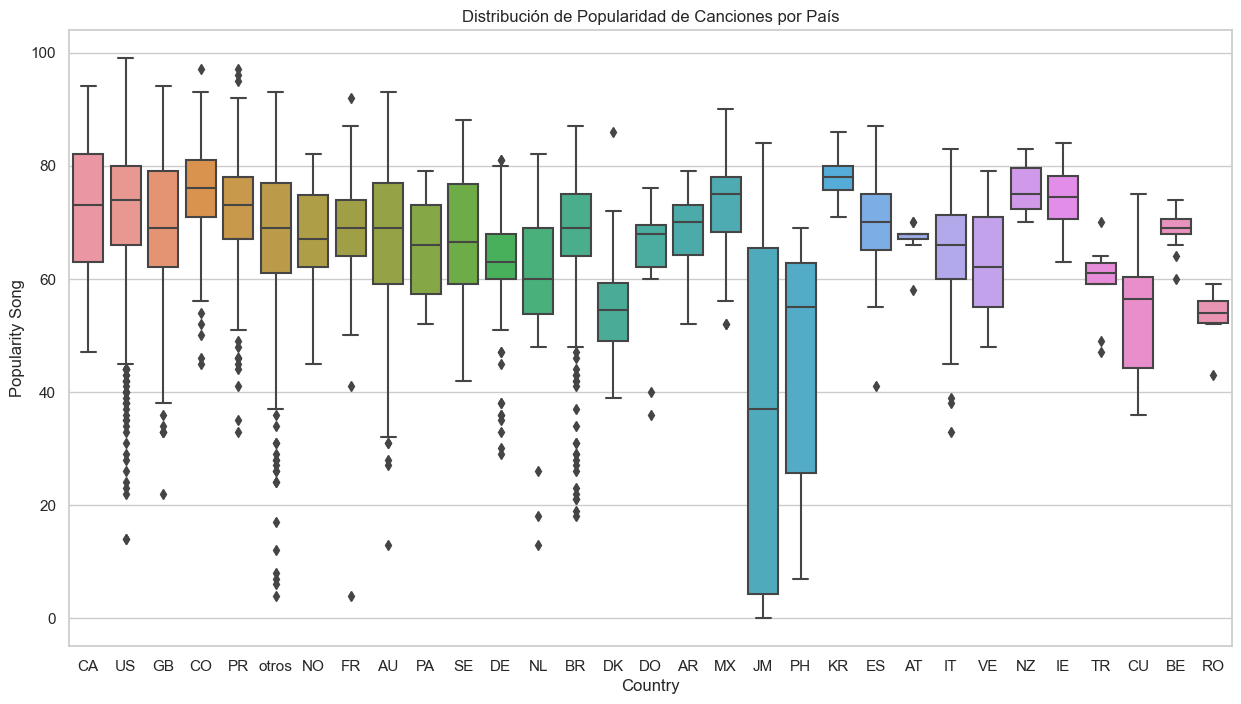

In [229]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Popularity Song', data=df)
plt.title('Distribución de Popularidad de Canciones por País')
plt.show()


**Observaciones y conclusiones:**

Rango y Bigotes:

**Más Rango:** Estados Unidos (US) tiene el rango más amplio en la popularidad de canciones, que va desde 22 hasta 99. Los bigotes en el boxplot también indican la mayor variabilidad en la distribución de la popularidad de las canciones en este país.

**Menos Rango:** Países como Austria (AT), República Dominicana (DO), y Nueva Zelanda (NZ) tienen un rango más estrecho, indicando una menor variación en la popularidad de las canciones. Por el mismo motivo que nos ha pasado 


**Mediana (línea en la caja):**

Alta Mediana: Corea del Sur (KR) tiene una mediana elevada, sugiriendo que la mayoría de las canciones en este país tienden a ser altamente populares.

**Baja Mediana: Filipinas (PH)** tiene una mediana significativamente más baja, lo que sugiere que hay una variedad considerable en la popularidad de las canciones en este país.

**Cuartiles y Boxplot:**

**Más Centralización:** Países como España (ES) y Puerto Rico (PR) tienen cajas (intercuartiles) más compactas, indicando una concentración más alta de la popularidad de las canciones alrededor de la mediana.

**Menos Centralización:** Otros países como Nueva Zelanda (NZ) y Australia (AU) tienen cajas más extendidas, lo que sugiere una distribución más dispersa en la popularidad de las canciones.

**Outliers (puntos fuera de los bigotes):**

**Más Outliers:** Puerto Rico (PR) muestra una cantidad significativa de outliers superiores, indicando algunas canciones excepcionalmente populares en comparación con el resto del país.

**Menos Outliers:** Países como Filipinas (PH) y Turquía (TR) tienen menos outliers, sugiriendo una menor variabilidad extrema en la popularidad de las canciones.

Estos patrones y observaciones son basados en las estadísticas descriptivas y el boxplot, y proporcionan información sobre la distribución de la popularidad de las canciones en diferentes países.

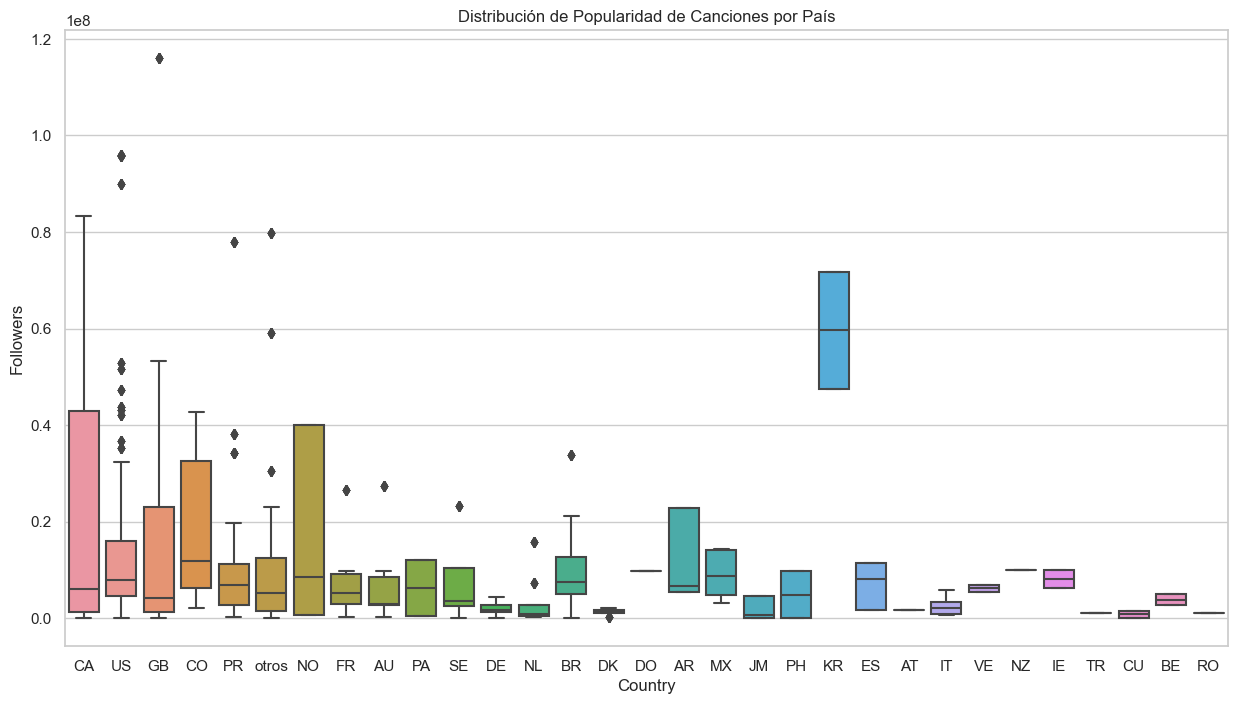

In [230]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Followers', data=df)
plt.title('Distribución de Popularidad de Canciones por País')
plt.show()

**Observaciones y conclusiones:**

Estados Unidos (US) y Gran Bretaña (GB) muestran el **rango más amplio** en términos de seguidores de los artistas, lo que sugiere una gran variabilidad en la cantidad de seguidores entre los artistas estadounidenses.

Austria (AT), Nueva Zelanda (NZ), Turquia (TR), Rumanía (RO), Dinamárca (DK) tienen un **rango muy estrecho**, indicando menos variabilidad en la cantidad de seguidores entre los artistas austriacos.

Corea del Sur (KR) tiene una **mediana alta** y compacta en la cantidad de seguidores de los artistas, sugiriendo que, en promedio, los artistas surcoreanos tienen una cantidad significativa de seguidores. Cabe destacar que contábamos con pocos artístas.
*
Países Bajos (NL) presenta una **mediana relativamente baja**, indicando una cantidad moderada de seguidores en promedio para los artistas neerlandeses.

Alemania (DE) y Países Bajos (NL) y Korea sur (KR), muestran una **distribución más centralizada** en la cantidad de seguidores, lo que indica que la cantidad de seguidores entre los artistas alemanes tiende a ser más uniforme.

Menos **Centralización**: Estados Unidos (US), Canadá (CA), Colombia (CO), Noruega (NO) y Argentina (AR) tienen una distribución menos centralizada, lo que sugiere una mayor variabilidad en la cantidad de seguidores.

Puerto Rico (PR) presenta **muchos valores atípicos**, destacando por tener artistas con gran cantidad de seguidores, al igual que Gran Bretaña (GB) y Estados Unidos (US) indicando que algunos artistas tienen una cantidad excepcionalmente alta de seguidores. También hay que tener en cuenta que contamos con más variedad de artistas en estos países.

Argentina (AR), México (MX), Jamaica (JM), Panamá (PA), Philipinas (PH), Korea del Sur (KR), España (ES), Noruega (NO),  **tienen pocos valores atípicos**, sugiriendo una menor variabilidad en la cantidad de seguidores entre los artistas.

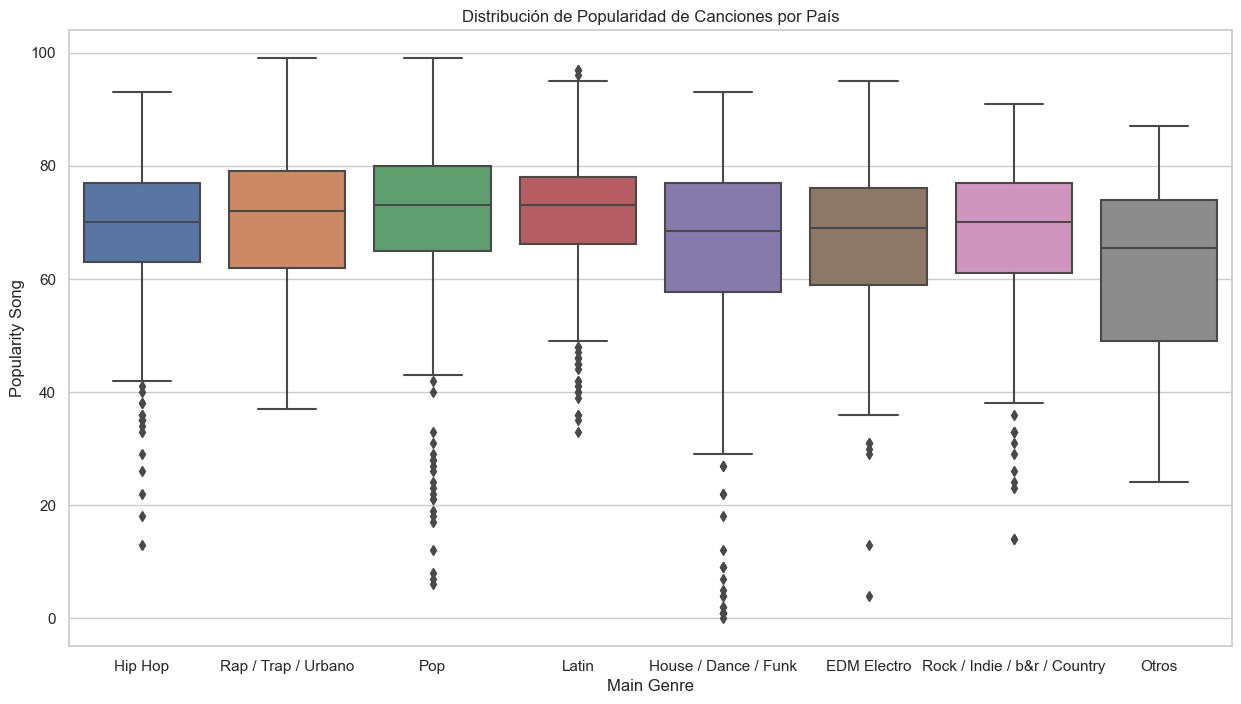

In [231]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Main Genre', y='Popularity Song', data=df)
plt.title('Distribución de Popularidad de Canciones por País')
plt.show()

**Género Musical y Popularidad de las canciones:**

El análisis de la distribución de la popularidad por género musical revela variaciones significativas.

Latin muestra la mediana más alta, indicando que, en promedio, las canciones de este género son más populares.

EDM Electro, Hip Hop y Rap / Trap / Urbano muestran dispersión moderada, mientras que House / Dance / Funk y Otros tienen una dispersión más amplia con valores atípicos más en la parte de menos popularidad.
La presencia de valores atípicos en algunos géneros indica canciones excepcionalmente impopulares.

La mediana (50%) sugiere una distribución realmente simétrica en los géneros musicales, porque es una medida robusta, y en muchos casos, está cerca del percentil 50, lo que sugiere una distribución relativamente 

**Comparación de Géneros:**
Pop y Latin tienen medias y medianas más altas, indicando que estas categorías tienden a tener canciones más 
La presencia de valores extremos en varios géneros sugiere la existencia de canciones excepcionales que se destacan en términos de popularidad.

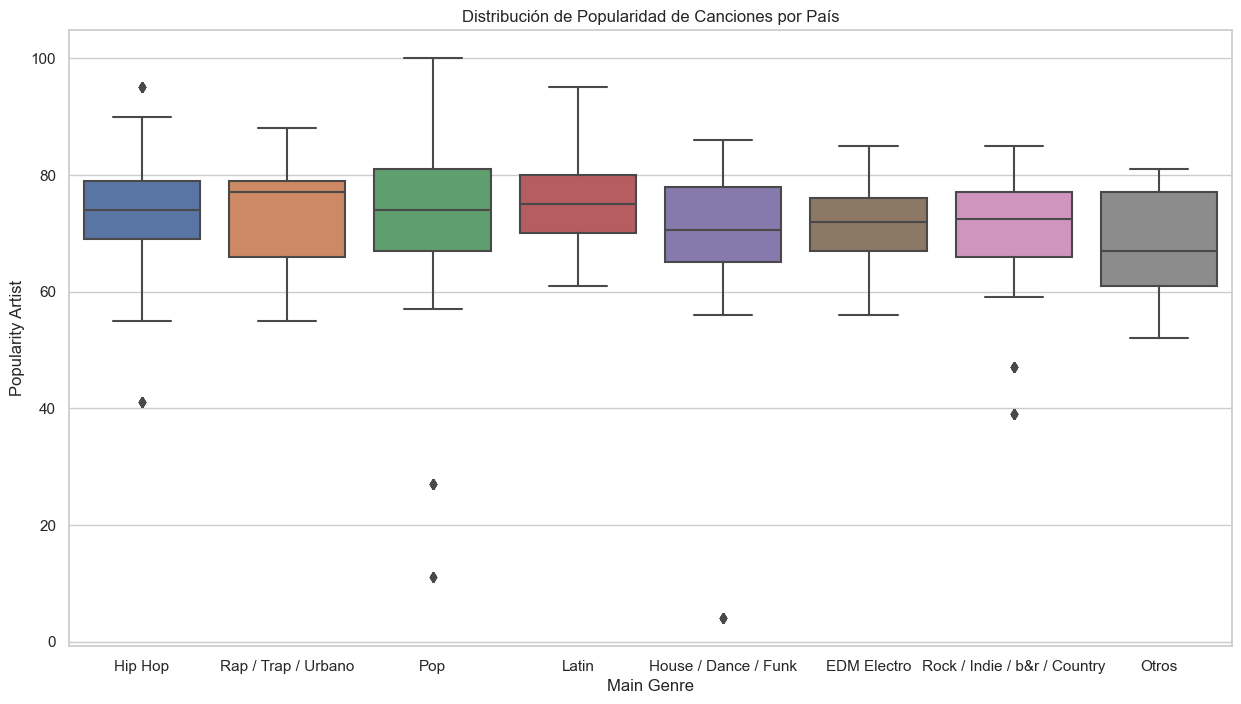

In [232]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Main Genre', y='Popularity Artist', data=df)
plt.title('Distribución de Popularidad de Canciones por País')
plt.show()

- Los boxplots revelan resultados bastante homogéneos en cuanto a la popularidad de artistas, aunque se observan más valores atípicos en los géneros de Pop, Rock y Hip Hop.
- En el género Pop, se abarcan tanto valores máximos como mínimos relativamente bajos, indicando una diversidad considerable en la popularidad de los artistas de este género.
- Para Hip Hop y Rock, se identifican algunos valores atípicos en la parte inferior de la escala de popularidad, lo que sugiere que estos géneros tienden a tener una concentración más alta de artistas con - niveles moderados a altos de popularidad.
- En el género House, se observan algunos valores atípicos con popularidades excepcionalmente bajas.
- Las medianas de la popularidad se mantienen consistentemente altas, siendo el género Rap/Trap/Urbano el que tiene la mediana más alta, seguido por el género Latino.
- Los géneros con las medianas más altas de popularidad son Pop y Latino.

In [233]:
columnas_numericas = df.select_dtypes(include=['number'])
columnas_categóricas = df.select_dtypes(include=['object'])
print("Columnas Numéricas:")
print(columnas_numericas.columns)
print("\nColumnas Categóricas:")
print(columnas_categóricas.columns)

Columnas Numéricas:
Index(['Popularity Artist', 'Followers', 'Artist Song Rank',
       'Total Album Tracks', 'Song Duration', 'Popularity Song'],
      dtype='object')

Columnas Categóricas:
Index(['Gender', 'Country', 'Artist Name', 'Track Name', 'Album Name',
       'Main Genre'],
      dtype='object')


Antes de realizar la estandarización, realizamos un Boxplot para detectar los Outliers (valores atípicos) y de este modo eligir el modelo a aplicar.

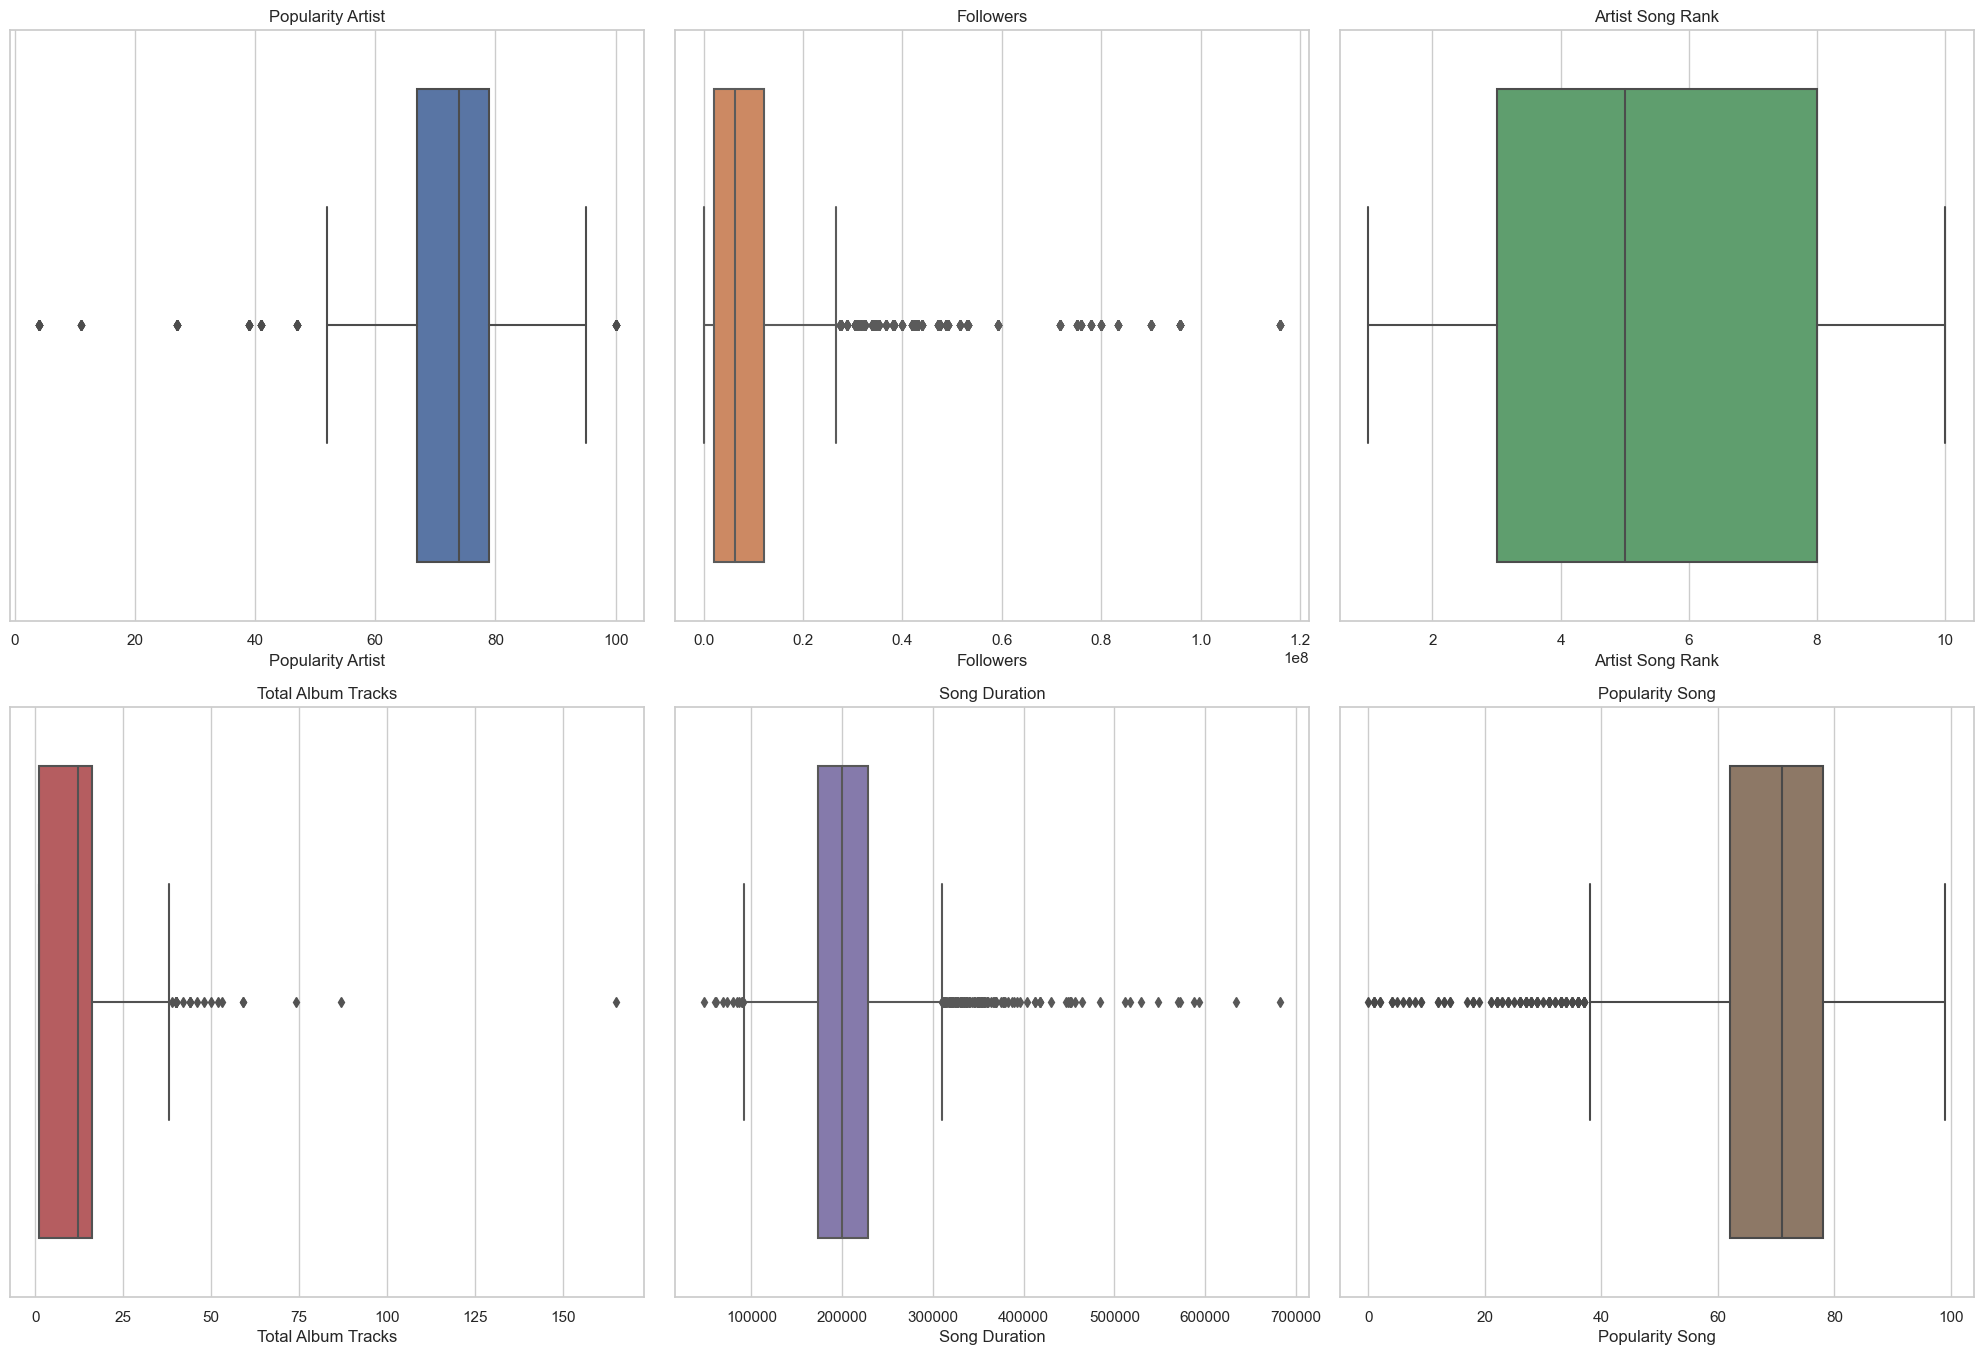

In [94]:
df_col_num = df.select_dtypes(include='number')

plt.figure(figsize=(20, 20))
palette = sns.color_palette("deep", n_colors=len(columnas_numericas.columns))
num_columns = 3

for i, column in enumerate(df_col_num .columns):
    plt.subplot((len(columnas_numericas.columns) // num_columns) + 1, num_columns, i + 1)
    sns.boxplot(x=columnas_numericas[column], orient="h", color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

- Todas tienen outliers a excepcion de artist song rank, puesto que se tratará como categórica. (Es ordinal y no respondería a un valor numérico en los estúdios).

## PROCESADO ##

In [234]:
# Crear copia del DataFrame original
df_procesado = df.copy()
df_procesado = df_procesado.drop(['Track Name', 'Album Name'], axis=1, errors='ignore')
df_procesado.head()

,Gender,Country,Popularity Artist,Followers,Artist Name,Artist Song Rank,Total Album Tracks,Is Explicit,Song Duration,Popularity Song,Main Genre
0,male,CA,95,83298497,Drake,1,23,True,260111,93,Hip Hop
1,male,CA,95,83298497,Drake,2,23,True,247444,91,Hip Hop
2,male,CA,95,83298497,Drake,3,23,True,319191,89,Hip Hop
3,male,CA,95,83298497,Drake,4,14,True,218364,89,Hip Hop
4,male,CA,95,83298497,Drake,5,20,False,173986,89,Hip Hop


- Procesamos primero 'Artist Song Rank' para que cuente como ordinal y pueda ser tratado como una categoría.

In [235]:
encoder = OrdinalEncoder()
df_procesado['Artist Song Rank'] = pd.to_numeric(df_procesado['Artist Song Rank'], errors='coerce')

# Reshape la columna 'Artist Song Rank' para que sea una matriz 2D (n_samples, n_features)
rank_column_reshaped = df_procesado['Artist Song Rank'].values.reshape(-1, 1)

# Aplica el encoder
df_procesado['Artist Song Rank'] = encoder.fit_transform(rank_column_reshaped)

- Convertimos 'Is Explicit' de booleano a int para que pueda ser tratada numericamente (0/1) y no como (True / False)

In [236]:
df_procesado['Is Explicit'] = pd.to_numeric(df_procesado['Is Explicit'], errors='coerce')
# Cambio el tipo de datos a int
df_procesado['Is Explicit'] = df_procesado['Is Explicit'].astype(int)

In [237]:
# Selecciono columnas categóricas
columnas_categoricas = df_procesado[['Gender', 'Country', 'Main Genre', 'Artist Name','Is Explicit']]
df_procesado = pd.concat([df_procesado.drop(columnas_categoricas, axis=1), pd.get_dummies(columnas_categoricas, drop_first=True)], axis=1)

# 'Popularity Song' no se aplica transformación puesto que es el target.

# Variables numéricas con outliers (aplicar RobustScaler)
columnas_con_outliers = df_procesado[['Popularity Artist', 'Followers', 'Total Album Tracks', 'Song Duration']]

# Variables numéricas sin outliers (aplicar MinMaxScaler)
columna_sin_outliers = df_procesado[['Artist Song Rank']]

# Aplicar RobustScaler a las columnas con outliers
scaler_robust = RobustScaler()
df_procesado[columnas_con_outliers.columns] = scaler_robust.fit_transform(df_procesado[columnas_con_outliers.columns])

# Aplicar MinMaxScaler a la columna sin outliers
scaler_minmax = MinMaxScaler()
df_procesado[columna_sin_outliers.columns] = scaler_minmax.fit_transform(df_procesado[columna_sin_outliers.columns])

In [238]:
df_procesado.head().round(0)

,Popularity Artist,Followers,Artist Song Rank,Total Album Tracks,Song Duration,Popularity Song,Is Explicit,Gender_female,Gender_male,Gender_mixed,...,Artist Name_Zara Larsson,Artist Name_Zion & Lennox,Artist Name_Zion.T,Artist Name_Zé Neto & Cristiano,Artist Name_bbno$,Artist Name_beabadoobee,Artist Name_benny blanco,Artist Name_blackbear,Artist Name_gnash,Artist Name_Ñengo Flow
0,2.0,8.0,0.0,1.0,1.0,93,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,8.0,0.0,1.0,1.0,91,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,8.0,0.0,1.0,2.0,89,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,8.0,0.0,0.0,0.0,89,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,8.0,0.0,1.0,-0.0,89,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
df_procesado.describe().round(0)

,Popularity Artist,Followers,Artist Song Rank,Total Album Tracks,Song Duration,Popularity Song,Is Explicit,Gender_female,Gender_male,Gender_mixed,...,Artist Name_Zara Larsson,Artist Name_Zion & Lennox,Artist Name_Zion.T,Artist Name_Zé Neto & Cristiano,Artist Name_bbno$,Artist Name_beabadoobee,Artist Name_benny blanco,Artist Name_blackbear,Artist Name_gnash,Artist Name_Ñengo Flow
count,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,...,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0
mean,-0.0,1.0,0.0,-0.0,0.0,69.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,2.0,0.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-6.0,-1.0,0.0,-1.0,-3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,-0.0,0.0,-1.0,-0.0,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,1.0,1.0,0.0,1.0,78.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.0,11.0,1.0,10.0,9.0,99.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## ENTRENAMIENTO ##

In [240]:
X = df_procesado.drop('Popularity Song', axis=1) #data
y = df_procesado['Popularity Song'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [241]:
X_train.describe().round(0)

,Popularity Artist,Followers,Artist Song Rank,Total Album Tracks,Song Duration,Is Explicit,Gender_female,Gender_male,Gender_mixed,Gender_other,...,Artist Name_Zara Larsson,Artist Name_Zion & Lennox,Artist Name_Zion.T,Artist Name_Zé Neto & Cristiano,Artist Name_bbno$,Artist Name_beabadoobee,Artist Name_benny blanco,Artist Name_blackbear,Artist Name_gnash,Artist Name_Ñengo Flow
count,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,...,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0,3229.0
mean,-0.0,1.0,1.0,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-6.0,-1.0,0.0,-1.0,-3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,-0.0,0.0,-1.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.0,11.0,1.0,5.0,9.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [242]:
X_test.describe().round(0)

,Popularity Artist,Followers,Artist Song Rank,Total Album Tracks,Song Duration,Is Explicit,Gender_female,Gender_male,Gender_mixed,Gender_other,...,Artist Name_Zara Larsson,Artist Name_Zion & Lennox,Artist Name_Zion.T,Artist Name_Zé Neto & Cristiano,Artist Name_bbno$,Artist Name_beabadoobee,Artist Name_benny blanco,Artist Name_blackbear,Artist Name_gnash,Artist Name_Ñengo Flow
count,808.0,808.0,808.0,808.0,808.0,808.0,808.0,808.0,808.0,808.0,...,808.0,808.0,808.0,808.0,808.0,808.0,808.0,808.0,808.0,808.0
mean,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-6.0,-1.0,0.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,-0.0,0.0,-1.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.0,11.0,1.0,10.0,6.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Vamos a ver si hay multicolonialidad (correlación alta entre variables) con el test de VIF. 

In [243]:
# Selecciona solo las variables predictoras de interés
X_selected = df_procesado[['Popularity Artist', 'Followers', 'Song Duration', 'Popularity Song','Total Album Tracks']]

# Agrega una constante
X_selected_with_constant = sm.add_constant(X_selected)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected_with_constant.values, i) for i in range(X_selected_with_constant.shape[1])]

print(vif_data)

             Variable        VIF
0               const  79.102739
1   Popularity Artist   3.395123
2           Followers   1.561414
3       Song Duration   1.028747
4     Popularity Song   2.689992
5  Total Album Tracks   1.075097


Los valores VIF obtenidos son relativamente bajos (menos de 5) y sugieren que estas variables tiene baja multicolinealidad con las demás variables en el modelo. Lo que implicará que no deberíamos tener problemas con los entrenamientos en este ámbito.

In [244]:
# Definir los modelos
models = {
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine (RBF Kernel)': SVR(kernel='rbf'),
    'Huber Regression': HuberRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosted Trees': GradientBoostingRegressor()
}

# Crear un diccionario para almacenar las métricas
metrics_dict = {}

# Evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Almacenar métricas en el diccionario
    metrics_dict[name] = {'Mean Squared Error (MSE)': mse, 'R-squared (R2)': r2}

# Mostrar las métricas
for name, metrics in metrics_dict.items():
    print(f"{name} Metrics:")
    print(f"Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']}")
    print(f"R-squared (R2): {metrics['R-squared (R2)']}")
    print("\n")

Ridge Regression Metrics:
Mean Squared Error (MSE): 30.293716618632168
R-squared (R2): 0.8237944648471596


Random Forest Metrics:
Mean Squared Error (MSE): 27.28196707920792
R-squared (R2): 0.8413125180468178


Support Vector Machine (RBF Kernel) Metrics:
Mean Squared Error (MSE): 50.369810429601245
R-squared (R2): 0.7070204519957725


Huber Regression Metrics:
Mean Squared Error (MSE): 31.929044980877634
R-squared (R2): 0.8142824623138405


Decision Tree Metrics:
Mean Squared Error (MSE): 45.18811881188119
R-squared (R2): 0.7371601260407783


Gradient Boosted Trees Metrics:
Mean Squared Error (MSE): 29.48344779340011
R-squared (R2): 0.8285074505057058




**Visualización del rendimiento de los modelos**

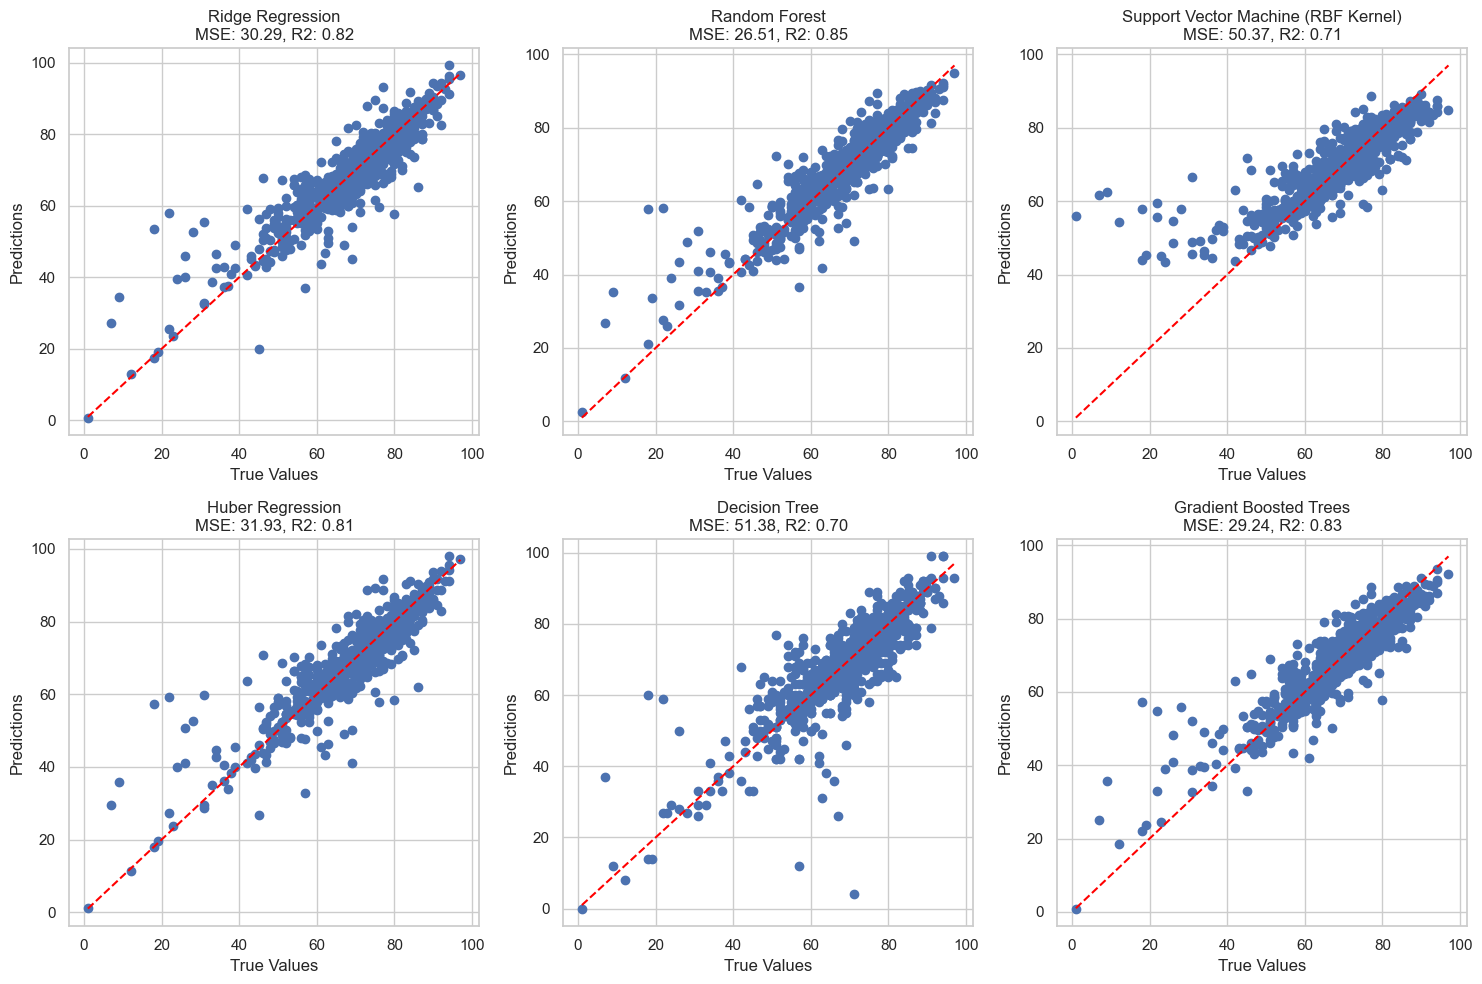

In [245]:
# Crear subgráficos
num_models = len(models)
num_rows = num_models // 3 + (num_models % 3 > 0)  # Calcular el número de filas necesario
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Evaluar cada modelo y mostrar en subplots
for idx, (name, model) in enumerate(models.items()):
    row = idx // num_cols
    col = idx % num_cols
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Crear gráfico en el subplot correspondiente
    axs[row, col].scatter(y_test, predictions)
    axs[row, col].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axs[row, col].set_title(f'{name}\nMSE: {mse:.2f}, R2: {r2:.2f}')
    axs[row, col].set_xlabel('True Values')
    axs[row, col].set_ylabel('Predictions')

# Ajustes de diseño
plt.tight_layout()
plt.show()

-  **Random Forest**, es el modelo que ha dado el mejor resultado, precedido por **Gradient Boosted Trees**, destacando con ligera diferencia de las demás en general. 

- **Ridge** y **Huber Regression** tienen también muy buenos resultados y el peor resultado lo tenemos con el modelo **Decision Tree** precedido por **suport vector machine**. 

**Ridge Regression:** MSE: 30.35 / R-squared (R2): 0.8234
Comentario: Muestra un rendimiento sólido con un R2 del **82.34%**, lo que indica que el modelo explica una gran parte de la variabilidad en los datos. El MSE  **(30.35)** sugiere un nivel razonable de precisión en las predicciones.

**Random Forest:** **MSE: 26.72 / R-squared (R2): 0.8446**
Comentario: Random Forest demuestra un buen rendimiento, con un R2 del **84.46%**. El MSE más bajo **(26.72)** en comparación con Ridge Regression sugiere que Random Forest podría ser más preciso en las predicciones.

**Support Vector Machine (RBF Kernel):** MSE: 49.81 / R-squared (R2): 0.7103
Comentario: El modelo SVM con kernel RBF tiene un R2 del **71.03%**, indicando una explicación moderada de la variabilidad. Sin embargo, el MSE más alto sugiere que las predicciones podrían ser menos precisas en comparación con Ridge y Random Forest.

**Huber Regression:** MSE: 32.35 / R-squared (R2): 0.8119
Comentario: Huber Regression presenta un rendimiento sólido con un R2 del **81.19%**. Aunque el MSE es más alto que el de Random Forest, sigue siendo razonable y podría haber sido elegido por su capacidad para manejar datos atípicos debido a la naturaleza robusta de la pérdida de Huber.

**Decision Tree:** MSE: 56.10 / R-squared (R2): 0.6737
Comentario: El Decision Tree tiene un R2 del **67.37%**, lo que sugiere que puede explicar una cantidad moderada de la variabilidad en los datos. Sin embargo, el MSE más alto indica que puede haber más error en las predicciones en comparación con algunos otros modelos.

**Gradient Boosted Trees:** **MSE: 29.61 / R-squared (R2): 0.8278**
Comentario: Gradient Boosted Trees muestra un rendimiento sólido, con un R2 del **82.78%**. El MSE bajo sugiere que este modelo puede proporcionar predicciones precisas, y su capacidad para mejorar iterativamente los errores podría ser beneficiosa.

**Visualización de Residuales de los modelos**

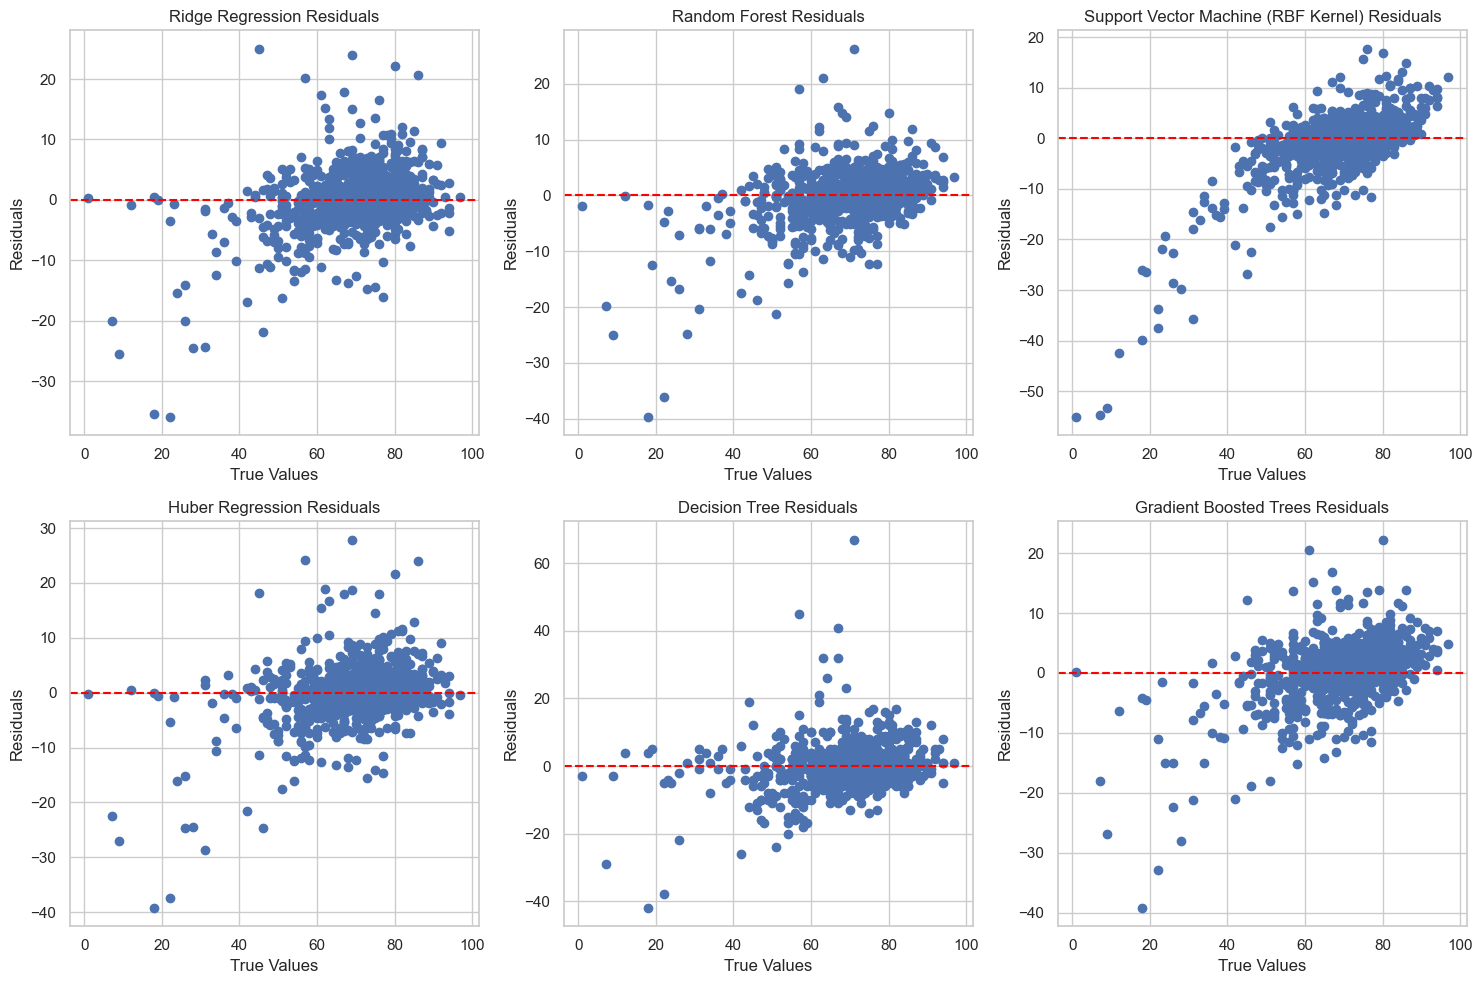

In [246]:
residuals = {}

# Calcular y almacenar los residuales para cada modelo
for name, model in models.items():
    # Escalar los datos para los modelos que lo requieran
    if 'Scaler' in str(type(model)):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    
    # Calcular los residuales
    residual = y_test - predictions
    residuals[name] = residual

# Crear un gráfico de dispersión para los residuales de cada modelo
plt.figure(figsize=(15, 10))

num_models = len(models)
num_rows = 2
num_cols = num_models // num_rows + (num_models % num_rows > 0)  # Redondeo hacia arriba

for idx, (name, residual) in enumerate(residuals.items(), start=1):
    # Crear subgráficos
    plt.subplot(num_rows, num_cols, idx)
    plt.scatter(y_test, residual)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'{name} Residuals')
    plt.xlabel('True Values')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


- Los residuales son la diferencia entre los valores observados y los valores predichos en un modelo.
cuanto mas cercano esten los puntos a la diagonal (x=y) mas preciso es el modelo. Los puntos en SVR, gradien y Huber, los puntos estan sutilmente más dispersos que en los otros. Aunque todos tienen puntos disperos. Lo que tambien supone variabilidad de datos.

Aplico **Grid Search** a los 3 modelos con mejores resultados, para encontrar los mejores hiperámetros y acabar de decidir cual es el mejor modelo

In [247]:
models = {
    'Gradient Boosted Trees': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }),
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'Ridge Regression': (Ridge(), {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    })
}

# Métricas a optimizar (en este caso, MSE y R^2)
scorers = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R^2': make_scorer(r2_score)
}

# Bucle para realizar la búsqueda de hiperparámetros para cada modelo
best_models = {}
for model_name, (model, param_grid) in models.items():
    for metric_name, scorer in scorers.items():
        grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Almacena el mejor modelo y sus parámetros
        if model_name not in best_models:
            best_models[model_name] = {}
        best_models[model_name][metric_name] = {
            'best_model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }

        # Imprime los resultados para cada modelo y métrica
        print(f"\nMejores parámetros para {model_name} - {metric_name}: {grid_search.best_params_}")
        print(f"Mejor puntuación para {model_name} - {metric_name}: {grid_search.best_score_:.4f}")


Mejores parámetros para Gradient Boosted Trees - MSE: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Mejor puntuación para Gradient Boosted Trees - MSE: -35.6398

Mejores parámetros para Gradient Boosted Trees - R^2: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Mejor puntuación para Gradient Boosted Trees - R^2: 0.7902

Mejores parámetros para Random Forest - MSE: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntuación para Random Forest - MSE: -35.9792

Mejores parámetros para Random Forest - R^2: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación para Random Forest - R^2: 0.7884

Mejores parámetros para Ridge Regression - MSE: {'alpha': 1.0, 'solver': 'saga'}
Mejor puntuación para Ridge Regression - MSE: -34.9781

Mejores parámetros para Ridge Regression - R^2: {'alpha': 1.0, 'solver': 'saga'}
Mejor puntuación para Ridge Regression - R^2: 0.7949


- Obtenemos los mejores hiperparámetros de los 3 modelos finalistas seleccionados.

APLICO LOS MEJORES HIPERPARÁMETROS PARA ENTRENAR LOS 3 MODELOS FINALISTAS y OBSERVO SI HAN MEJORADO MODELOS APLICÁNDOLOS. VUELVO A SACAR LAS MÉTRICAS MSE Y R2 DE RENDIMINETO.

In [248]:
# Define los modelos con los mejores hiperparámetros para MSE
rf_params_mse = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
gbt_params_mse = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
ridge_params_mse = {'alpha': 1.0, 'solver': 'saga'}

rf_model_mse = RandomForestRegressor(**rf_params_mse)
gbt_model_mse = GradientBoostingRegressor(**gbt_params_mse)
ridge_model_mse = Ridge(**ridge_params_mse)

# Entrena los modelos con el conjunto original de entrenamiento
rf_model_mse.fit(X_train, y_train)
gbt_model_mse.fit(X_train, y_train)
ridge_model_mse.fit(X_train, y_train)

# Haz predicciones en el conjunto de prueba
y_pred_rf_mse = rf_model_mse.predict(X_test)
y_pred_gbt_mse = gbt_model_mse.predict(X_test)
y_pred_ridge_mse = ridge_model_mse.predict(X_test)

# Evalúa el rendimiento en el conjunto de prueba original
mse_rf_mse = mean_squared_error(y_test, y_pred_rf_mse)
r2_rf_mse = r2_score(y_test, y_pred_rf_mse)

mse_gbt_mse = mean_squared_error(y_test, y_pred_gbt_mse)
r2_gbt_mse = r2_score(y_test, y_pred_gbt_mse)

mse_ridge_mse = mean_squared_error(y_test, y_pred_ridge_mse)
r2_ridge_mse = r2_score(y_test, y_pred_ridge_mse)

print(f'Modelo Random Forest con hiperparámetros MSE - MSE: {mse_rf_mse:.4f}, R^2: {r2_rf_mse:.4f}')
print(f'Modelo Gradient Boosted Trees con hiperparámetros MSE - MSE: {mse_gbt_mse:.4f}, R^2: {r2_gbt_mse:.4f}')
print(f'Modelo Ridge Regression con hiperparámetros MSE - MSE: {mse_ridge_mse:.4f}, R^2: {r2_ridge_mse:.4f}')


Modelo Gradient Boosted Trees - MSE:
MSE: 27.9491
R^2: 0.8374
---------------------------------------------
Modelo Random Forest - MSE:
MSE: 25.9371
R^2: 0.8491
---------------------------------------------
Modelo Ridge Regression - MSE:
MSE: 30.2865
R^2: 0.8238
---------------------------------------------


- Hago una tabla para visualizar a nivel numérico las predicciones frente a los valores reales

In [253]:
# Métricas antes de la mejora de hiperparámetros
metrics_before = {
    'Ridge Regression': {'MSE': 30.293716618632168, 'R2': 0.8237944648471596},
    'Random Forest': {'MSE': 26.833271163366337, 'R2': 0.8439223894259913},
    'Gradient Boosted Trees': {'MSE': 29.79447581166775, 'R2': 0.8266983341435138}
}

# Métricas después de la mejora de hiperparámetros
metrics_after = {
    'Ridge Regression': {'MSE': 30.2865, 'R2': 0.8238},
    'Random Forest': {'MSE': 25.9371, 'R2': 0.8491},
    'Gradient Boosted Trees': {'MSE': 27.9491, 'R2': 0.8374}
}

# CDataFrames para las métricas antes y después
df_before = pd.DataFrame(metrics_before).T
df_after = pd.DataFrame(metrics_after).T

# Reorganizar columnas 
df_comparison = pd.concat([df_before[['MSE', 'R2']], df_after[['MSE', 'R2']]], axis=1)

# Renombrar columnas para distinguir antes y después
df_comparison.columns = ['Antes MSE', 'Antes R2', 'Después MSE', 'Después R2']

print("Tabla de comparación de métricas antes y después de mejorar hiperparámetros:")
df_comparison

Tabla de comparación de métricas antes y después de mejorar hiperparámetros:


,Antes MSE,Antes R2,Después MSE,Después R2
Ridge Regression,30.293717,0.823794,30.2865,0.8238
Random Forest,26.833271,0.843922,25.9371,0.8491
Gradient Boosted Trees,29.794476,0.826698,27.9491,0.8374


- La mejora de hiperparámetros tuvo un impacto positivo en el rendimiento de Gradient Boosted Trees, reduciendo el MSE y mejorando el R2.
- Los resultados de Ridge Regression y Random Forest, se mantuvieron sólidos.

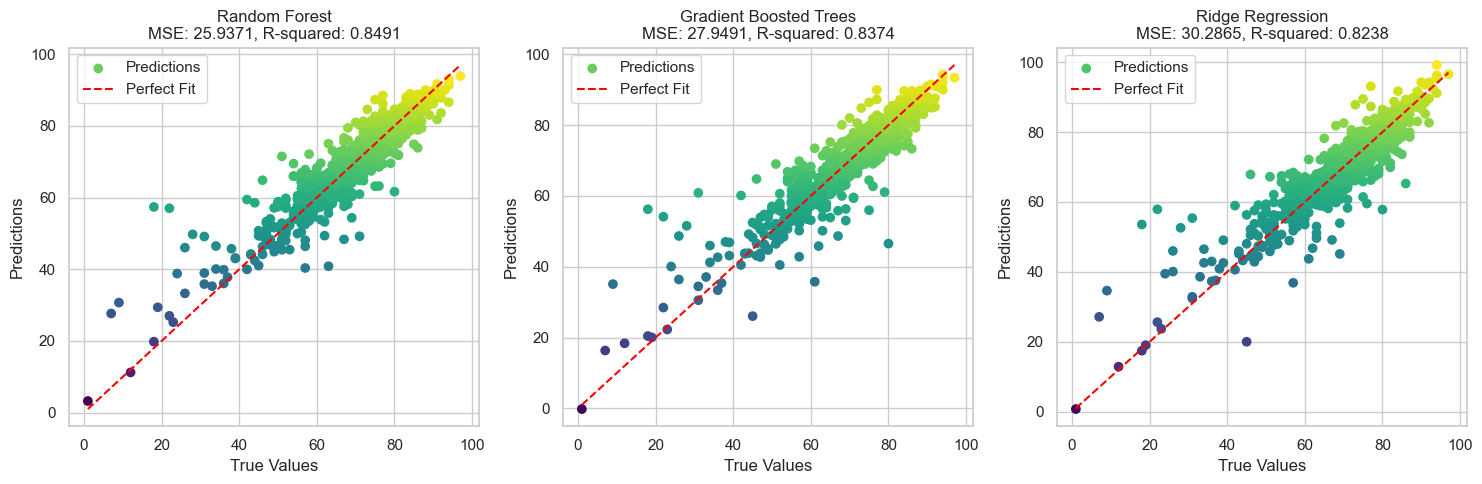

In [252]:
plt.figure(figsize=(15, 5))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_rf_mse, cmap='viridis', c=y_pred_rf_mse, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title(f'Random Forest\nMSE: {mse_rf_mse:.4f}, R-squared: {r2_rf_mse:.4f}')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Gradient Boosted Trees
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_gbt_mse, cmap='viridis', c=y_pred_gbt_mse, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title(f'Gradient Boosted Trees\nMSE: {mse_gbt_mse:.4f}, R-squared: {r2_gbt_mse:.4f}')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Ridge Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge_mse, cmap='viridis', c=y_pred_ridge_mse, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title(f'Ridge Regression\nMSE: {mse_ridge_mse:.4f}, R-squared: {r2_ridge_mse:.4f}')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.tight_layout()
plt.show()


- Observamos que los tres modelos han ofrecido un muy buen rendimiento y serían óptimos para predicciones

**POSIBLES MEJORAS:** 

- Entrenar el modelo nuevamente utilizando todos los datos de entrenamiento (incluyendo los que se usaron para la validación). Esto podría mejorar el rendimiento.
- Pruebas adicionales en conjuntos de datos que el modelo **no ha visto antes** para evaluar su capacidad de generalización.

**ENTRENAMIENTO DEL MODELO UTILIZANDO TODOS LOS DATOS DEL CONJUNTO** 

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define los modelos con los mejores hiperparámetros para MSE
rf_params_mse = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
gbt_params_mse = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
ridge_params_mse = {'alpha': 1.0, 'solver': 'saga'}

rf_model_mse = RandomForestRegressor(**rf_params_mse)
gbt_model_mse = GradientBoostingRegressor(**gbt_params_mse)
ridge_model_mse = Ridge(**ridge_params_mse)

# Entrena los modelos con todos los datos originales de entrenamiento
rf_model_mse.fit(X, y)
gbt_model_mse.fit(X, y)
ridge_model_mse.fit(X, y)

# Haz predicciones en el conjunto de prueba
y_pred_rf_mse = rf_model_mse.predict(X_test)
y_pred_gbt_mse = gbt_model_mse.predict(X_test)
y_pred_ridge_mse = ridge_model_mse.predict(X_test)

# Evalúa el rendimiento en el conjunto de prueba original
mse_rf_mse = mean_squared_error(y_test, y_pred_rf_mse)
r2_rf_mse = r2_score(y_test, y_pred_rf_mse)

mse_gbt_mse = mean_squared_error(y_test, y_pred_gbt_mse)
r2_gbt_mse = r2_score(y_test, y_pred_gbt_mse)

mse_ridge_mse = mean_squared_error(y_test, y_pred_ridge_mse)
r2_ridge_mse = r2_score(y_test, y_pred_ridge_mse)

print(f'Modelo Random Forest con hiperparámetros MSE - MSE: {mse_rf_mse:.4f}, R^2: {r2_rf_mse:.4f}')
print(f'Modelo Gradient Boosted Trees con hiperparámetros MSE - MSE: {mse_gbt_mse:.4f}, R^2: {r2_gbt_mse:.4f}')
print(f'Modelo Ridge Regression con hiperparámetros MSE - MSE: {mse_ridge_mse:.4f}, R^2: {r2_ridge_mse:.4f}')


Modelo Random Forest con hiperparámetros MSE - MSE: 3.9187, R^2: 0.9752
Modelo Gradient Boosted Trees con hiperparámetros MSE - MSE: 15.1107, R^2: 0.9044
Modelo Ridge Regression con hiperparámetros MSE - MSE: 22.0190, R^2: 0.8607


- Podemos observar una gran mejora en todos los modelos. Teniendo unos resultados impresionantes con el modelo Random Forest

## Conclusión: ## 
### Los tres modelos han ofrecido un muy buen rendimiento y serían óptimos para obtener mi objetivo: "Construir y evaluar modelos de aprendizaje automático para aplicaciones específicas en la industria de la música y el entretenimiento." ###